<a href="https://colab.research.google.com/github/matotim35/ECM514-Ciencia-de-Dados/blob/main/EstudoP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

# Pandas 1


In [ ]:
import pandas as pd
import numpy as np

Criando uma series
Dataframe =  conjunto de series = conjunto de colunas

In [ ]:
nomes = pd.Series(['Ana','Bia','Batman'])
idade = pd.Series ([18,19,20])

df = pd.DataFrame({'Name': nomes,'Age':idade})
df

,Name,Age
0,Ana,18
1,Bia,19
2,Batman,20


Lendo um arquivo online e inserindo ele no DF

In [ ]:
contas = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/tips.csv')
contas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


O comando df.head() permite exibir o aspecto inicial dos dados a partir de suas primeiras linhas.

Lendo um arquivo local e inserindo ele no DF

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

## Explorando a estrutura basica de dados


In [ ]:
contas.shape #numero de linhas e colunas

(244, 7)

In [ ]:
len(contas)#numero de linhas

244

In [ ]:
contas.columns.to_list() #headers

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [ ]:
contas.dtypes #ipos de atributos

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

O comando describe() exibe informações estatísticas sumarizadas dos dados.

In [ ]:
contas.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## Selecionando dados

Selecionando colunas de dados

In [ ]:
df.<nome do atributo>

ou

df['<nome do atributo>']

eles retornam o mesmo resultado e a segunda forma é sempre necessária quando temos nomes de atributos com espaços ou caracteres especiais.

In [ ]:
contas.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

Operacoes com as series

In [ ]:
print(f'Media das gorjetas: USD {contas.tip.mean() :.2f} e Total de gorjetas: USD {contas.tip.sum() :.2f}')

Media das gorjetas: USD 3.00 e Total de gorjetas: USD 731.58


Transformar series em lista do python
para aplicar operacoes do python


In [ ]:
dias = contas.day
dias = dias.to_list()
dias.count('Sat')

87

## Selecionando mais de uma coluna de dados


In [ ]:
selecao_contas = contas[['total_bill','tip','size']]
selecao_contas

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


A seleção com uma ou mais colunas informadas em uma lista, retorna um DataFrame. Note que df['tip'] retorna um pd.Series, enquanto, selecionar df[['tip']] retorna um pd.DataFrame de uma única coluna.

## Maiores e menores

In [ ]:
contas.nsmallest(5,'total_bill') #nsmallest(num de itens para resposta, coluna para comparar)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


In [ ]:
contas.nlargest(5,'total_bill')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


## Alterando e Incluindo Colunas de Dados

In [ ]:
dolarReal = 5.8
contas['total_bill'] = contas['total_bill'] * 5.8   #Alterando atributo
contas['tip'] = contas['tip'] * 5.8                 #Alterando atributo

contas['Total_bill_minus_tips']=contas['total_bill'] - contas['tip']  #Adicionando atributo
contas['bill_by_head']=contas['total_bill'] / contas['size']          #Adicionando atributo
contas.head()


,total_bill,tip,sex,smoker,day,time,size,Total_bill_minus_tips,bill_by_head
0,98.542,5.858,Female,No,Sun,Dinner,2,92.684,49.271000
1,59.972,9.628,Male,No,Sun,Dinner,3,50.344,19.990667
2,121.858,20.300,Male,No,Sun,Dinner,3,101.558,40.619333
3,137.344,19.198,Male,No,Sun,Dinner,2,118.146,68.672000
4,142.622,20.938,Female,No,Sun,Dinner,4,121.684,35.655500


## Selecionar linhas

In [ ]:
contasNFumante = contas[contas.smoker == 'No']
contasFumante = contas[contas.smoker =='Yes']

In [ ]:
print(f'Percentual de Clientes Fumantes {len( contasFumante ) / len( contas ) :.2f} %')

Percentual de Clientes Fumantes 0.38 %


## Seleção de linhas e colunas

Fumantes ou mulheres, pagam mais gorjeta(em média)

In [ ]:
contas[contas.smoker =='Yes']['tip'].mean()> contas[contas.smoker =='No']['tip'].mean()


True

In [ ]:
contas[contas.sex =='Female']['tip'].mean()> contas[contas.sex =='Male']['tip'].mean()


False

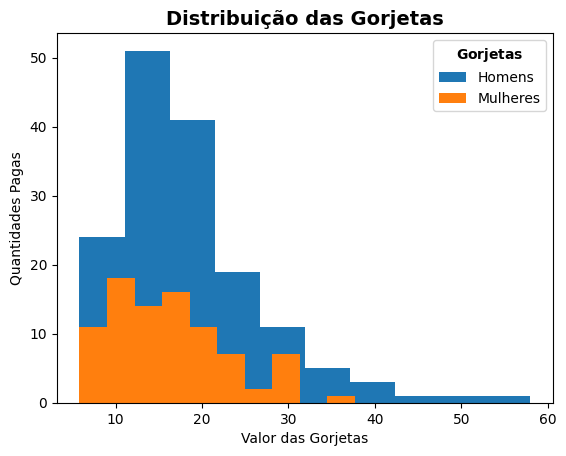

In [ ]:
import matplotlib.pyplot as plt
plt.hist(contas[ contas.sex == 'Male' ]['tip'], label='Homens')
plt.hist(contas[ contas.sex == 'Female' ]['tip'], label='Mulheres')

plt.xlabel('Valor das Gorjetas')
plt.ylabel('Quantidades Pagas')
plt.title('Distribuição das Gorjetas', fontsize=14, weight='bold')
plt.legend(title='$\\bf{Gorjetas}$')
plt.show()

## Agregação de dados

Mas como podemos obter as médias de idade por sexo ou o preço máximo do m2 dos imóveis por região?


O groupby é a função que permite agregar esses dados e obter estatísticas ou aplicar funções a várias classes ou grupos de dados.

### Funcionamento do GroupBy
A operação de groupby consiste em geral de 3 etapas:

Divisão dividir e agrupar dos dados dependendo de um valor de chave especificada.
Aplicar uma computação, em geralmente uma estatística agregada como média, count ou max, uma transformação ou filtragem para os grupos individuais.
Combinar os resultados dessas operações em uma saída única.

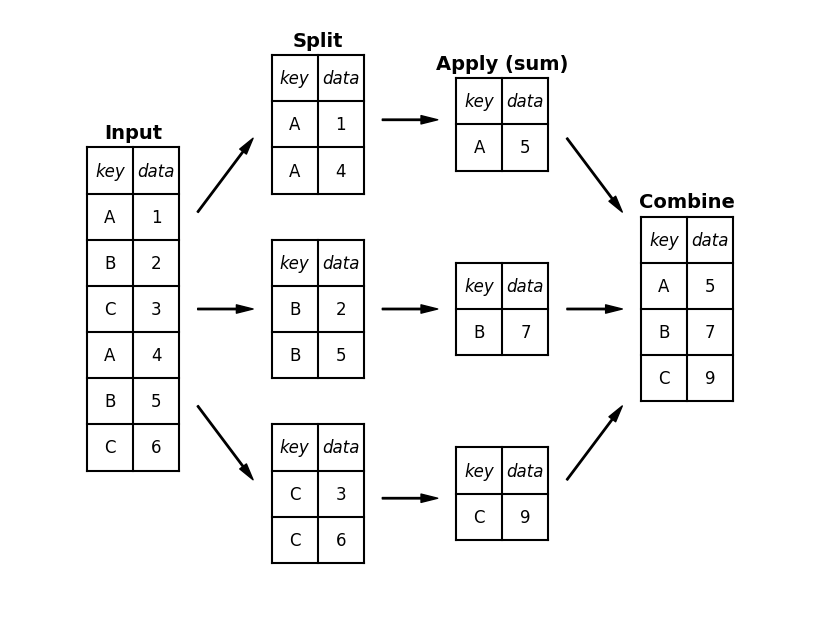

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + 1
    nrows = len(df.index) + 1

    dx = dy = width / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels
    for i in range(nrows - 1):
        plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                 str(df.index[::-1][i]), **textstyle)

    # Create column labels
    for i in range(ncols - 1):
        plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)

    # Add index label
    if df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            plt.text(x + (j + 1.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)


#----------------------------------------------------------
# Draw figure

import pandas as pd
df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
df.index.name = 'key'


fig = plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.axes([0, 0, 1, 1])

ax.axis('off')

draw_dataframe(df, [0, 0])

for y, ind in zip([3, 1, -1], 'ABC'):
    split = df[df.index == ind]
    draw_dataframe(split, [2, y])

    sum = pd.DataFrame(split.sum()).T
    sum.index = [ind]
    sum.index.name = 'key'
    sum.columns = ['data']
    draw_dataframe(sum, [4, y + 0.25])

result = df.groupby(df.index).sum()
draw_dataframe(result, [6, 0.75])

style = dict(fontsize=14, ha='center', weight='bold')
plt.text(0.5, 3.6, "Input", **style)
plt.text(2.5, 4.6, "Split", **style)
plt.text(4.5, 4.35, "Apply (sum)", **style)
plt.text(6.5, 2.85, "Combine", **style)

arrowprops = dict(facecolor='black', width=1, headwidth=6)
plt.annotate('', (1.8, 3.6), (1.2, 2.8), arrowprops=arrowprops)
plt.annotate('', (1.8, 1.75), (1.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (1.8, -0.1), (1.2, 0.7), arrowprops=arrowprops)

plt.annotate('', (3.8, 3.8), (3.2, 3.8), arrowprops=arrowprops)
plt.annotate('', (3.8, 1.75), (3.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (3.8, -0.3), (3.2, -0.3), arrowprops=arrowprops)

plt.annotate('', (5.8, 2.8), (5.2, 3.6), arrowprops=arrowprops)
plt.annotate('', (5.8, 1.75), (5.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (5.8, 0.7), (5.2, -0.1), arrowprops=arrowprops)

plt.axis('equal')
plt.ylim(-1.5, 5);

fig.savefig('03.08-split-apply-combine.png')

In [ ]:
df.groupby(df.index).sum()

,data
key,
A,5
B,7
C,9


In [ ]:
display( df.groupby(df.index).mean() )
display( df.groupby(df.index).std() )
display( df.groupby(df.index).min() )

,data
key,
A,2.5
B,3.5
C,4.5


,data
key,
A,2.12132
B,2.12132
C,2.12132


,data
key,
A,1
B,2
C,3


In [ ]:
pedidos = pd.DataFrame( {'Pedido': pd.Series([ 1, 1, 1, 2, 2, 2, 2, 3, 3]),
                         'Itens': pd.Series([ 'Tênis Corrida', 'Tênis Caminhada', 'Camiseta', 'Tênis Caminhada', 'Camiseta', 'Boné' , 'Keds' ,'Tênis Caminhada', 'Camiseta' ]),
                         'Preco Unidade': pd.Series([ 300, 250, 90, 250, 90, 60, 250, 250, 90]),
                         'Quantidade': pd.Series([ 1, 2, 3, 2, 1, 1, 3, 2, 1]) } )
pedidos

,Pedido,Itens,Preco Unidade,Quantidade
0,1,Tênis Corrida,300,1
1,1,Tênis Caminhada,250,2
2,1,Camiseta,90,3
3,2,Tênis Caminhada,250,2
4,2,Camiseta,90,1
5,2,Boné,60,1
6,2,Keds,250,3
7,3,Tênis Caminhada,250,2
8,3,Camiseta,90,1


As operações são aplicadas somente valores numéricos

In [ ]:
display(pedidos.groupby('Pedido').agg(['mean','std','min'])) #agrega varios operadores, mean desvio padrao e min

<ipython-input-6-9b62216c258f>:1: FutureWarning: ['Itens'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(pedidos.groupby('Pedido').agg(['mean','std','min']))


Preco Unidade                 Quantidade              
                mean         std min       mean       std min
Pedido                                                       
1         213.333333  109.696551  90       2.00  1.000000   1
2         162.500000  101.775898  60       1.75  0.957427   1
3         170.000000  113.137085  90       1.50  0.707107   1

Mas as funções, se aplicáveis, podem envolver também atributos categóricos,

In [ ]:
display( pedidos.groupby('Pedido').max() )

,Itens,Preco Unidade,Quantidade
Pedido,,,
1,Tênis Corrida,300,3
2,Tênis Caminhada,250,3
3,Tênis Caminhada,250,2


In [ ]:
display( pedidos.groupby('Itens')['Quantidade'].agg(['mean', 'std', 'min', 'count']) )


,mean,std,min,count
Itens,,,,
Boné,1.000000,NaN,1,1
Camiseta,1.666667,1.154701,1,3
Keds,3.000000,NaN,3,1
Tênis Caminhada,2.000000,0.000000,2,3
Tênis Corrida,1.000000,NaN,1,1


E, finalmente, as agregações também podem envolver mais que um nível de valores chave,

In [ ]:
display( pedidos.groupby( ['Itens','Pedido'] ).agg(['min','max']) )

Preco Unidade      Quantidade    
                                 min  max        min max
Itens           Pedido                                  
Boné            2                 60   60          1   1
Camiseta        1                 90   90          3   3
                2                 90   90          1   1
                3                 90   90          1   1
Keds            2                250  250          3   3
Tênis Caminhada 1                250  250          2   2
                2                250  250          2   2
                3                250  250          2   2
Tênis Corrida   1                300  300          1   1

## Acessando Chaves e Valores dos Grupos
O método groupby retorna um objeto do tipo DataFrameGroupBy e não um DataFrame e essa é uma grande diferença entre essa função no Pandas e no SQL. Os métodos de DataFrame não podem ser aplicados a um obejto do tipo DataFrameGroupBy, enquanto na SQL um SELECT com GROUPY no SQL retorna uma tabela e todas as operações de tabela são aplicáveis.

In [ ]:
pedidos.groupby('Itens')

A estrutura desses dados é basicamente na forma de um dicionário e você pode acessar as chaves e os seus valores

In [ ]:
grupos_itens = pedidos.groupby('Itens')
print ( grupos_itens )
print ( grupos_itens.groups )
print ( grupos_itens.groups.keys() )
print ( grupos_itens.groups.values() )

{'Boné': [5], 'Camiseta': [2, 4, 8], 'Keds': [6], 'Tênis Caminhada': [1, 3, 7], 'Tênis Corrida': [0]}
dict_keys(['Boné', 'Camiseta', 'Keds', 'Tênis Caminhada', 'Tênis Corrida'])
dict_values([Int64Index([5], dtype='int64'), Int64Index([2, 4, 8], dtype='int64'), Int64Index([6], dtype='int64'), Int64Index([1, 3, 7], dtype='int64'), Int64Index([0], dtype='int64')])


In [ ]:
pedidos.groupby('Itens').Quantidade.sum() # total de quantidades por item

Itens
Boné               1
Camiseta           5
Keds               3
Tênis Caminhada    6
Tênis Corrida      1
Name: Quantidade, dtype: int64

## Acessando os valores
Você pode referenciar diretamente o atributo em um grupo para obter uma Serie Pandas e, então, operar esses valores como abaixo,

In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum()

,Quantidade,Preco Unidade
Itens,,
Boné,1,60
Camiseta,5,270
Keds,3,250
Tênis Caminhada,6,750
Tênis Corrida,1,300


In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum()['Quantidade']

Itens
Boné               1
Camiseta           5
Keds               3
Tênis Caminhada    6
Tênis Corrida      1
Name: Quantidade, dtype: int64

Mas um artíficio bastante prático que você pode empregar, se não estiver preocupado com o desempenho e uso de recursos de memória das operações, é transformar o seu agrupamento em um DataFrame para que você possa aplicar as operações que já conhece para essa classe diretamente,

In [ ]:
df = pd.DataFrame( pedidos.groupby('Itens')[['Quantidade','Preco Unidade']].sum() ).reset_index()
df.head()

,Itens,Quantidade,Preco Unidade
0,Boné,1,60
1,Camiseta,5,270
2,Keds,3,250
3,Tênis Caminhada,6,750
4,Tênis Corrida,1,300


## Concatenação
Você pode concatenar tabelas de dados no sentido das linhas ou das colunas. O caso 'feliz' nessas operações é quando o número de colunas é o mesmo (concatenação no sentido das linhas) ou quando o número de linhas é o mesmo (concatenação no sentido das colunas).

In [ ]:
import pandas as pd

# Escola 1
df = pd.DataFrame({'Nome': ['Adriana', 'Daniel', 'Henrique'],
                   'Curso': ['Graduação','Graduação','Ensino Médio'],
                   'Idade': [34, 25, 17]})

# Escola 2
df2 = pd.DataFrame({'Nome': ['Beatriz', 'Anna'],
                   'Curso': ['Graduação', 'Ensino Médio'],
                   'Idade': [34, 17],
                   'Ingresso': [2018, 2020]})

# Preferências
df3 = pd.DataFrame({'Nome': ['Adriana', 'Daniel', 'Henrique', 'Beatriz', 'Anna'],
                   'Musica': ['Rock', 'MPB', 'HipHop', 'Jazz', 'Jazz']})

display(df, df2, df3)

,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17


,Nome,Curso,Idade,Ingresso
0,Beatriz,Graduação,34,2018
1,Anna,Ensino Médio,17,2020


,Nome,Musica
0,Adriana,Rock
1,Daniel,MPB
2,Henrique,HipHop
3,Beatriz,Jazz
4,Anna,Jazz


In [ ]:
df4 = df2[['Nome','Curso','Idade']]

display(df, df4,
        pd.concat([df,df4]))

,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17


,Nome,Curso,Idade
0,Beatriz,Graduação,34
1,Anna,Ensino Médio,17


,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17
0,Beatriz,Graduação,34
1,Anna,Ensino Médio,17


In [ ]:
df5 = df3[['Musica']].head(3)

display(df, df5,
        pd.concat([df,df5],axis=1))

,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17


,Musica
0,Rock
1,MPB
2,HipHop


,Nome,Curso,Idade,Musica
0,Adriana,Graduação,34,Rock
1,Daniel,Graduação,25,MPB
2,Henrique,Ensino Médio,17,HipHop


No caso de não termos as quantidades de linhas ou colunas iguais conforme o sentido da combinação, os valores ausentes são preenchidos com NaN.

In [ ]:
display(df, df2,
        pd.concat([df,df2]))

,Nome,Curso,Idade
0,Adriana,Graduação,34
1,Daniel,Graduação,25
2,Henrique,Ensino Médio,17


,Nome,Curso,Idade,Ingresso
0,Beatriz,Graduação,34,2018
1,Anna,Ensino Médio,17,2020


,Nome,Curso,Idade,Ingresso
0,Adriana,Graduação,34,NaN
1,Daniel,Graduação,25,NaN
2,Henrique,Ensino Médio,17,NaN
0,Beatriz,Graduação,34,2018.0
1,Anna,Ensino Médio,17,2020.0


## Junções
As junções empregam um atributo chave para match ou junção dos dados e desempenham um papel muito importante na combinações de diferentes dados. Aqui as operações seguem o mesmo princípio dos joins da SQL e os seus resultados também são novos DataFrames, incluindo os conceitos inner e outter joins.

Temos 3 tipos de junções:

*   Inner, incluímos somente linhas com match das chaves nas duas tabelas

*   Outter, incluímos linhas independente do match das chaves nas duas tabelas
Left, incluímos linhas com match das chaves nas duas tabelas + linhas da tabela à esquerda independente de match
Right, incluímos linhas com match das chaves nas duas tabelas + linhas da tabela à direita independente de match

### Inner Join

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df1, df2, df3)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


No primeiro exemplo a junção é feita empregando o atributo employee para match dos dados. Os três comandos primeiros comandos abaixo produzem os mesmos resultados.

In [ ]:
df4 = pd.merge(df1, df2)
df4 = pd.merge(df1, df2, left_on='employee', right_on='employee')
df4 = pd.merge(df1, df2, on='employee')
display(df4)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


os demais exemplos apresentam várias formas de junções dos dados.

In [ ]:
display(df3, df4, pd.merge(df3, df4))

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor,employee,hire_date
0,Accounting,Carly,Bob,2008
1,Engineering,Guido,Jake,2012
2,Engineering,Guido,Lisa,2004
3,HR,Steve,Sue,2014


In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display(df1, df5, pd.merge(df1, df5))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [ ]:
df6 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df6, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Right Left Joins
Right e Left Joins são empregados quando queremos adicionar à combinação dos dados elementos independentemente de fazerem match com as chaves de dados ou não.

In [ ]:
df7 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Adriana'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Commercial']})

df8 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR', 'Research'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization', 'Data Science']})


In [ ]:
display(df7,df8,pd.merge(df7,df8))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Commercial


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization
6,Research,Data Science


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


Na junção acima você não encontra a funcionária Adriana por que a chave (atributo group) Commercial só está presente na tabela à esquerda da junção. Para incluí-la, podemos fazer uma junção Left,

In [ ]:
display(df7,df8,
        pd.merge(df7,df8,how='left'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Commercial


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization
6,Research,Data Science


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization
8,Adriana,Commercial,NaN


Do mesmo modo o skill Data Science não aparece na junção inicial por que a chave (atributo group) Research só está presente na tabela à direita da junção. Para incluí-la, podemos fazer uma junção Right,

In [ ]:
display(df7,df8,
        pd.merge(df7,df8,how='right'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Commercial


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization
6,Research,Data Science


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Lisa,Engineering,coding
4,Jake,Engineering,linux
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization
8,NaN,Research,Data Science


Para inclusão de dados de ambas as tabelas podemos empregar o full outter joins das tabelas,

In [ ]:
display(df1,df5,
        pd.merge(df1,df5,how='outer'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


### Reshape dos dados
Vamos concluir falando sobre operações de reshape, ou de alteração da forma dos dados.

Em muitos casos práticos os dados não estarão exatamente no melhor formato para sua análise. Podemos ter dados em colunas quanto queríamos que estivessem em linhas ou vice-versa. Empregamos então transformações para reshape dos dados. O Pandas fornece duas funções úteis para isso, o melt para levar dados de colunas para linhas e pivot para trazer dados de linhas para colunas.

Melt, pd.melt(df, id_vars = , value_vars = )
Esta função incluirá para cada id uma nova variável com os valores do campo value_vars.

In [ ]:
display(df,
        pd.melt(df, id_vars =['Nome'], value_vars =['Curso']))

KeyError: ignored

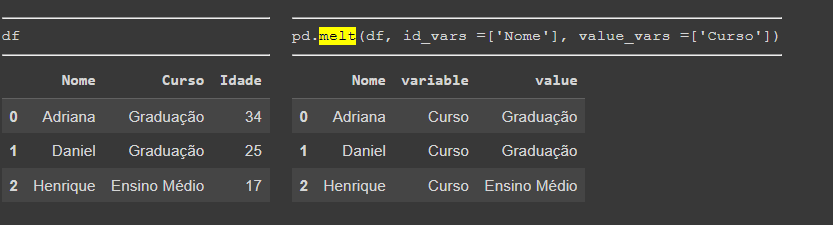

In [ ]:
display('df',
        "pd.melt(df, id_vars =['Nome'], value_vars =['Curso','Idade'])")

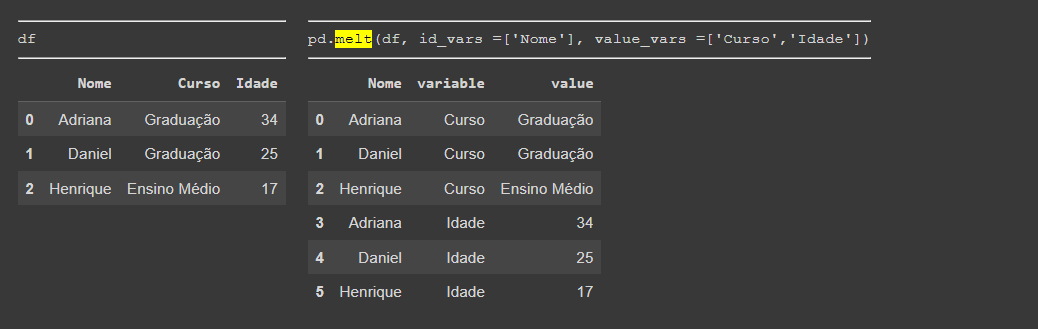

Os parâmetros var_name e value_name podem ser empregados para alterar o nome dos atributos criados.

In [ ]:
display('df',
        "pd.melt(df, id_vars =['Nome'], value_vars =['Idade'], var_name ='Tipo_atributo', value_name ='Valor_atributo')")

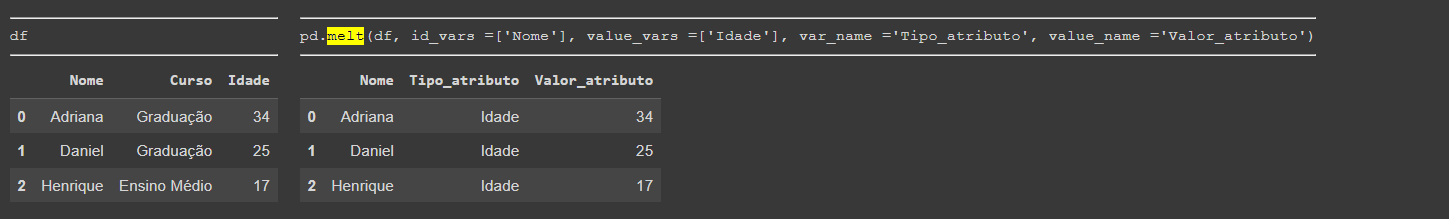

### pd.pivot(df, index= , columns= , values= )
 Esta função cria para cada valor de uma coluna uma linha com os valores correspondentes,

In [ ]:
display('df',
        "pd.pivot(df, 'Nome', 'Curso', 'Idade')")

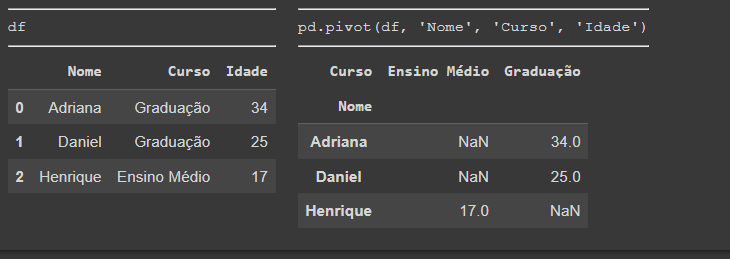

E você pode achar útil empregar o reset_index() ao conjunto de dados criado,

In [ ]:
df2 = pd.pivot(df, 'Nome', 'Curso', 'Idade')
df3 = pd.pivot(df, 'Nome', 'Curso', 'Idade').reset_index()
df3.columns.name = ''

print(df2.columns)
print(df3.columns)

display('df2','df3')


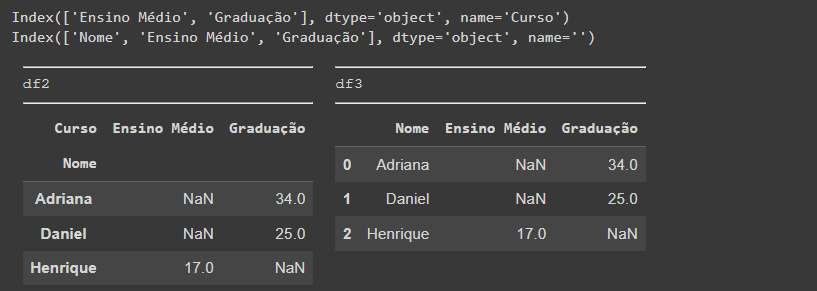

### Pandas DataFrames e Séries Exercicio

a) Crie um arquivo demo.txt com uma mensagem texto em sua máquina local.

b) Empregue a API do Google Colab para fazer o upload do arquivo demo.txt no Colab e crie um programa Python que lê este arquivo no Colab.

c) Repita o exercício anterior lendo agora o arquivo demo.txt de seu Google Drive. Para isso, salve o arquivo demo.txt no seu Google Drive e empregue a API do Google Colab para conectar o Google Drive ao seu Colab.

In [ ]:
#a) e b)

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

#Outra alternativa
# Você pode fazer isso manualmente criando um arquivo demo.txt com o notepad na sua máquina
#!echo "Gostar é provavelmente a melhor maneira de ter, ter deve ser a pior maneira de gostar (José Saramago)" > demo.txt

#from google.colab import files
#files.download('demo.txt')

#!rm demo.txt

Saving demo.txt to demo.txt
User uploaded file "demo.txt" with length 11 bytes


In [ ]:
#c)
from google.colab import drive
drive.mount('/content/drive')
dfDemo = open("demo.txt", "r")
for line in dfDemo:
  print(line)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
eae cambada


# Seleção de dados Exercicio 1

Acesse a base de dados insurance para as questões a seguir.

Q1. Acesse os dados explore a estrutura básica dos dados de insurance.
Qual o número de caso de seguro?
Quantos atributos são numéricos?
Há quantos valores diferentes para região?
Qual a maior quantidade de filhos?

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Rogerio-mack/IMT_Ciencia_de_Dados/main/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Qual o número de casos no seguro?

In [ ]:
print(len(df))

#ou

#df.shape

1338


Quantos atributos são numéricos?

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Age,bmi,children,charges

Há quantos valores diferentes para região?

In [ ]:
print(df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


Qual a maior quantidade de filhos?

In [ ]:
print(df.nlargest(5,'children'))

     age     sex    bmi  children smoker     region    charges
32    19  female  28.60         5     no  southwest  4687.7970
71    31    male  28.50         5     no  northeast  6799.4580
166   20  female  37.00         5     no  southwest  4830.6300
413   25    male  23.90         5     no  southwest  5080.0960
425   45    male  24.31         5     no  southeast  9788.8659


Q2. Qual a quantidade de casos por região?

In [ ]:
print(df['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Q3. Qual a média dos pagamentos (charges) efetuados?

In [ ]:
print(df['charges'].mean())

#print( f'Média de pagamentos efetuados {df.charges.mean():.2f}' )

13270.422265141257


Q4. Qual a média dos pagamentos (charges) dos 10 maiores pagamentos efetuados?

In [ ]:
print(df['charges'].nlargest(10).mean())

55130.961078


Q5. Calcule a distância interquartis dos pagamentos.

Dica Empregue a função quantile() do Pandas e use IQR = Q3 - Q1.

In [ ]:
IQR = df.charges.quantile(0.75) - df.charges.quantile(0.25)
IQR

11899.625365


Q6. Empregue o valor IQR da questão anterior para verificar se existem outliers dos pagamentos.
Dica outliers são dados fora do intervalo  [Q1−1.5IQR,Q3+1.5IQR]


In [ ]:
inf = df.charges.quantile(0.25) - 1.5 * IQR
sup = df.charges.quantile(0.75) + 1.5 * IQR
print(inf, sup)

-13109.1508975 34489.350562499996


In [ ]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
sum(df.charges < inf)

0

In [ ]:
sum(df.charges > sup)

139

In [ ]:
sum(df.charges < inf) + sum(df.charges > sup)

139

Q7. Qual a média dos pagamentos efetuados para os 10 casos com menor idade dos segurados? Aqui, empregue a função nsmallest().

In [ ]:
print(df.nsmallest(10,'age')['charges'].mean())

#less10 = df.nsmallest(10,'age')
#less10.charges.mean()

11968.65424


Q8. Revise a questão anterior. De fato calculamos a média de todos os seguros de indivíduos com idade entre as 10 menores idades?
Dica Verifique quantos indivíduos há com a menor idade

In [ ]:
df.age.value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

Existem 69 indivíduos com a menor idade (18 anos) e o cálculo dos valores para as 10 menores idades deveria considerar esses 69 valores.

Aprenderemos depois como fazer essa seleção de dados.

# Seleção de dados Exercicio 2

Q1. Considere a base de dados tips. Considerando somente os finais de semana, quem tem média de participantes na mesa maior, fumantes ou não fumantes?

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Rogerio-mack/IMT_Ciencia_de_Dados/main/data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#df[ (df.smoker == 'Yes') & (df.day.isin(['Sat','Sun'])) ]['size'].mean()

#df[ (df.smoker == 'No') & (df.day.isin(['Sat','Sun'])) ]['size'].mean()

#print('Não fumantes tem média de participantes na mesa maior que fumantes? ',
#      df[ (df.smoker == 'Yes') & (df.day.isin(['Sat','Sun'])) ]['size'].mean() <
#      df[ (df.smoker == 'No') & (df.day.isin(['Sat','Sun'])) ]['size'].mean())

#Usando groupby

df[ df.day.isin(['Sat','Sun']) ].groupby('smoker')['size'].mean()

smoker
No     2.764706
Yes    2.508197
Name: size, dtype: float64

Cuidado... size é uma palavra reservada, assim com o date, type (último exercício) e outras tantas, mas que ainda podem ser empregadas como nome das colunas...

CASE Insurance
Acesse a base de dados insurance para as questões a seguir.

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q2. Qual percentual de homens e mulheres assegurados na base?

In [ ]:
fem = len( df[df.sex == 'female'] ) / len(df)
print(f'Percentual de Mulheres seguradas: {fem:.2f}')

masc = len( df[df.sex == 'male'] ) / len(df)
print(f'Percentual de Homens segurados: {masc:.2f}')

Percentual de Mulheres seguradas: 0.49
Percentual de Homens segurados: 0.51


In [ ]:
#ou
df.groupby('sex').sex.count() / df.sex.count()

sex
female    0.494768
male      0.505232
Name: sex, dtype: float64

Q3. Qual o total do valor de seguro pago por homens e mulheres segurados na base?

In [ ]:
df[df.sex == 'male']['charges'].sum()

9434763.79614

In [ ]:
df[df.sex == 'female']['charges'].sum()

8321061.194619

In [ ]:
df.groupby('sex').charges.sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

Q4. Qual o precentual de valor de seguros pagos por homens e mulheres segurados na base?

In [ ]:
df.groupby('sex').charges.sum() / df.charges.sum()

sex
female    0.468638
male      0.531362
Name: charges, dtype: float64

Q5. Não fumantes apresentam em média mais filhos?

In [ ]:
df[df.smoker == 'yes'].children.mean() > df[df.smoker == 'no'].children.mean()

True

Q6. Qual a média e maior de idade dentre os segurados homem, das regiões northwest ou northeast?

In [ ]:
df[df.region.isin(['northwest','northeast'])].groupby('sex').age.mean()

#df[ (df.sex == 'male') & (df.region.isin(['northwest','northeast']) ) ].age.mean()

sex
female    39.615385
male      38.848765
Name: age, dtype: float64

CASE European Energy

Qual o tipo de Energia mais produzido na Europa? O uso de fontes renováveis já é significativo?
Explore aqui como é a produção de Energia na Europa empregando a base de dados energy_types. Você pode achar útil fazer uma exploração inicial dos dados antes de começar.

In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/energy_types.csv')

df.head()

,country,country_name,type,level,2016,2017,2018
0,BE,Belgium,Conventional thermal,Level 1,30728.0,31316.0,30092.635
1,BE,Belgium,Nuclear,Level 1,41430.0,40128.5,26995.628
2,BE,Belgium,Hydro,Level 1,1476.0,1360.9,1239.248
3,BE,Belgium,Pumped hydro power,Level 2,1110.0,1093.2,983.190
4,BE,Belgium,Wind,Level 1,5340.0,6387.9,7177.346


Q7. Quantos tipos de energia e países diferentes há na base?

In [ ]:
df['type'].unique()

array(['Conventional thermal', 'Nuclear', 'Hydro', 'Pumped hydro power',
       'Wind', 'Solar', 'Geothermal', 'Other'], dtype=object)

In [ ]:
df['country_name'].unique()

array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', nan, 'Norway',
       'Montenegro', 'North Macedonia', 'Albania', 'Serbia', 'Turkey',
       'Bosnia & Herzegovina', 'Ukraine', 'Georgia'], dtype=object)

Q8. Qual o percentual de energia nuclear produzido na Europa no ano de 2018?

In [ ]:
df[df.type == 'Nuclear']['2018'].sum() / df['2018'].sum()

0.22925252769137672

Q9. Qual o percentual de energia nuclear produzido na França no ano de 2018?

In [ ]:
df[(df.type == 'Nuclear') & (df.country_name == 'France')]['2018'].sum() / df[df.country_name == 'France']['2018'].sum()

0.7010980377654339

Q10. Qual o percentual de energias limpas produzida na Europa no ano de 2018?
Energias limpas somente Hidroelétrica, Eólica, Solar e Geotérmica.

In [ ]:
df[ df.type.isin(['Hydro',
                  'Wind',
                  'Solar',
                  'Geothermal']) ]['2018'].sum() / df['2018'].sum()

0.3053953330199326

Q11. Considerando os anos de 2016, 2017 e 2018, a produção de energias limpas tem aumentado na Europa? Verifique em termos absolutos e percentuais.
Energias limpas somente Hidroelétrica, Eólica, Solar e Geotérmica.

In [ ]:
# Você pode fazer separadamente, mas se empregar os recursos de programação
# que aprendeu até aqui, como o for, listas etc. ficará bem mais inteligente...

clean_energy = ['Hydro', 'Wind', 'Solar', 'Geothermal']
years = ['2016','2017','2018']

for year in years:
  print(year, '\nTotal: \t\t ', df[ df.type.isin(clean_energy) ][year].sum() )
  print('Percentual: \t', f'{df[ df.type.isin(clean_energy) ][year].sum() / df[year].sum():.4f}')
  print()

2016 
Total: 		  1072303.537
Percentual: 	 0.2834

2017 
Total: 		  1077515.942
Percentual: 	 0.2820

2018 
Total: 		  1156738.155
Percentual: 	 0.3054



# Matplotlib

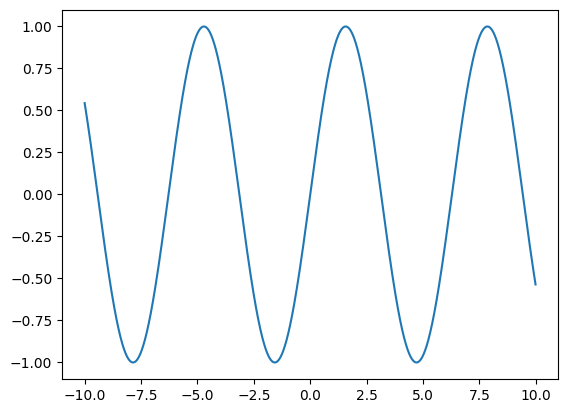

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x))
plt.show()


## Exercício 1 plt.plot(), function.
Produza um gráfico de linha da função  tanh(x)  para  x∈[−10,10] .

Inclua um título com a função
Altere a cor e o estilo de linha do gráfico
Altere o tamanho da figura
Inclua rótulos para os eixos do gráfico

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
def f(x):
  return np.tanh(x)

x = np.arange(-10.0,10.0,0.05)
y = f(x)

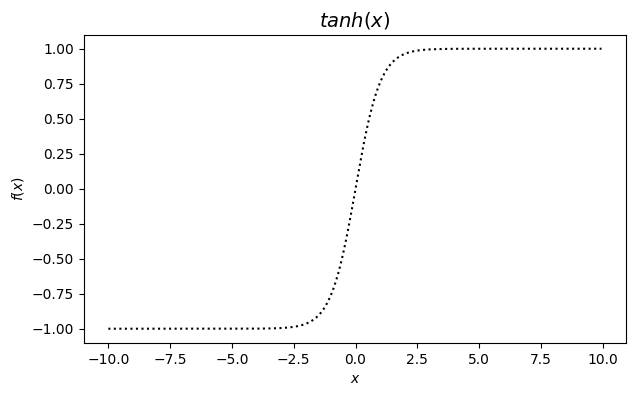

In [ ]:
plt.figure(figsize=(7,4))

plt.plot(x, y, color='k', linestyle=':')
# plt.plot(x, y, 'k:')
plt.title('$tanh(x)$',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

## Exercício 2 plt.plot(), random data.
Produza um gráfico a partir do dataframe abaixo.

Inclua um título
Altere a cor e o estilo de linha do gráfico
Altere o tamanho da figura
Inclua rótulos para os eixos do gráfico

In [ ]:
df = pd.DataFrame()
df['x-values'] = np.arange(0,10,0.01)
df['y-values'] = np.random.sample(len(df))
df.head()

,x-values,y-values
0,0.00,0.043737
1,0.01,0.118541
2,0.02,0.233782
3,0.03,0.302505
4,0.04,0.680069


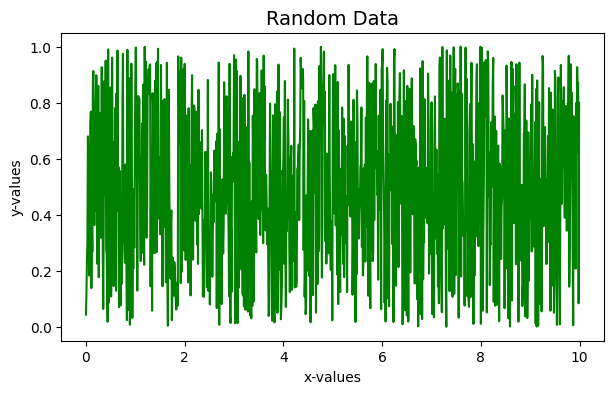

In [ ]:
plt.figure(figsize=(7,4))

plt.plot('x-values', 'y-values', data=df, color='g', linestyle='-')
# plt.plot(df['x-values'], df['y-values'], color='g', linestyle='-')
plt.title('Random Data',fontsize=14)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

## CASE: fmri
Nos exercícios a seguir partimos da seguinte base de dados:

In [ ]:
df = sns.load_dataset('fmri')
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Explore a base antes de prosseguir. Ordene os dados no tempo antes de seguir.

Dica: df.sort_values()

In [ ]:
df = df.sort_values('timepoint')
df.head()

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
258,s7,0,stim,parietal,0.004081
259,s6,0,stim,parietal,-0.023319
260,s5,0,stim,parietal,-0.051228
865,s5,0,cue,frontal,-0.027033


Exercício 3
Produza um gráfico como abaixo para o sujeito s0. Observe todos os elementos do gráfico como a seleção dos dados (sujeito s0, região parietal e evento de stim), títulos e rótulos.

imagem

Q. Para o sujeito s0, os valores de sinal encontram-se melhor em que intervalo de valores?

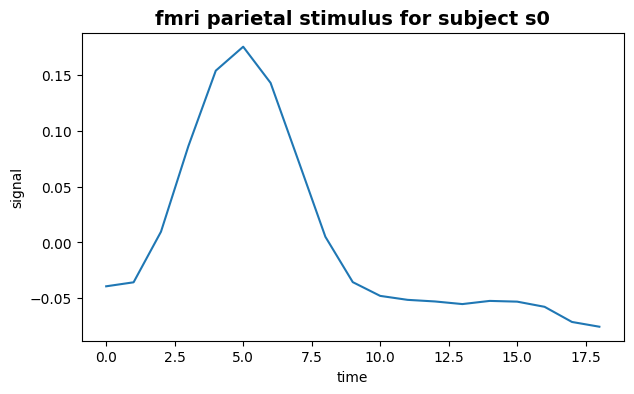

In [ ]:
fig = plt.figure(figsize=(7,4))

mask = (df.subject == 's0') & (df.event == 'stim') & (df.region == 'parietal')
plt.plot(df[ mask ].timepoint, df[ mask ].signal)

plt.title('fmri parietal stimulus for subject s0', fontsize=14, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')

plt.show()

fig.savefig('ex_matplotlib1_3.png')

Exercício 4
Produza um gráfico como abaixo para o sujeito s0. Observe todos os elementos do gráfico como a seleção dos dados (sujeito s0, região parietal e eventos de stim e cue), títulos e rótulos.

Q. Para o sujeito s0, os valores de repouso (cue) apresentam uma variação menor que a dos estímulos?

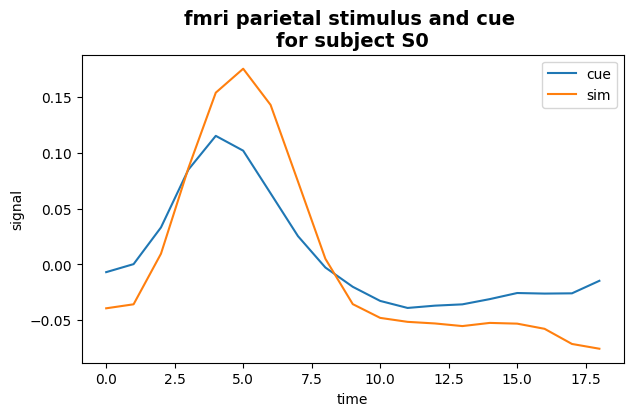

In [ ]:
fig = plt.figure(figsize=(7,4))

mask = (df.subject == 's0') & (df.event == 'cue') & (df.region == 'parietal')
plt.plot(df[ mask ].timepoint, df[ mask ].signal, label='cue')
mask = (df.subject == 's0') & (df.event == 'stim') & (df.region == 'parietal')
plt.plot(df[ mask ].timepoint, df[ mask ].signal, label='sim')

plt.title('fmri parietal stimulus and cue \nfor subject S0', fontsize=14, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.show()

fig.savefig('ex_matplotlib1_4.png')

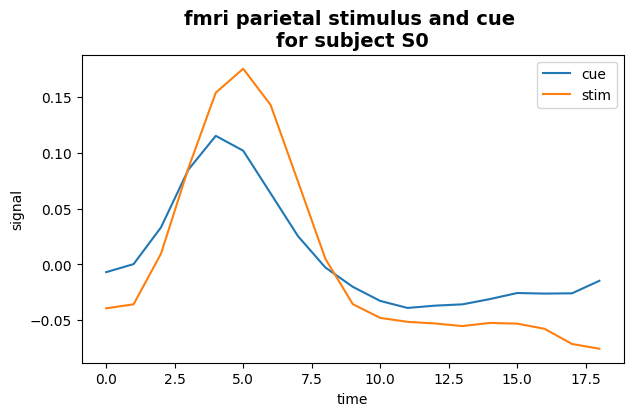

In [ ]:
#ou
fig = plt.figure(figsize=(7,4))

for e in df.event.unique():
  mask = (df.subject == 's0') & (df.event == e) & (df.region == 'parietal')
  plt.plot(df[ mask ].timepoint, df[ mask ].signal, label=e)

plt.title('fmri parietal stimulus and cue \nfor subject S0', fontsize=14, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.show()

Exercício 5 plt.subplot(nrow, ncol, nr)
Produza um gráfico como abaixo para os sujeitos s0 e s1, em uma mesma figura empregando o modo script layer. Observe todos os demais elementos do gráfico.

Q. Para o sujeito s1, os sinais apresentam uma variação menor, aproximadamente igual ou maior com relação ao sujeito s0?

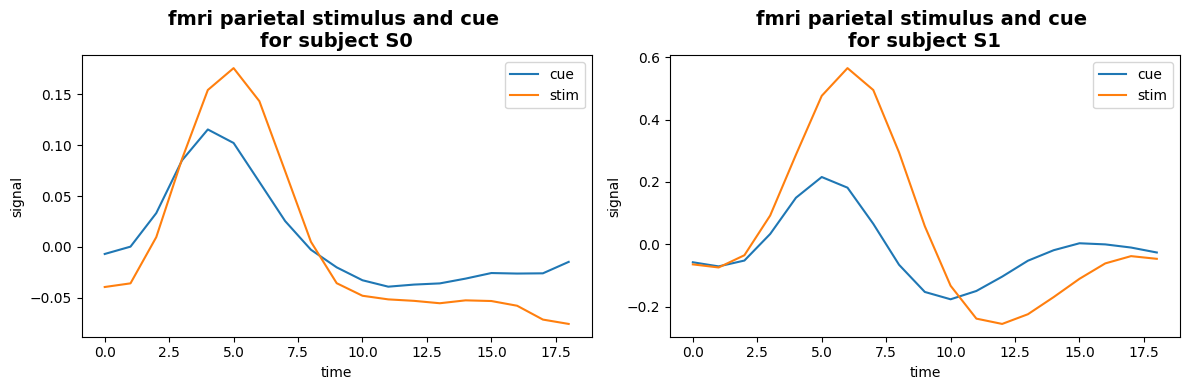

In [ ]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for e in df.event.unique():
  mask = (df.subject == 's0') & (df.event == e) & (df.region == 'parietal')
  plt.plot(df[ mask ].timepoint, df[ mask ].signal, label=e)

plt.title('fmri parietal stimulus and cue \nfor subject S0', fontsize=14, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.subplot(1,2,2)
for e in df.event.unique():
  mask = (df.subject == 's1') & (df.event == e) & (df.region == 'parietal')
  plt.plot(df[ mask ].timepoint, df[ mask ].signal, label=e)

plt.title('fmri parietal stimulus and cue \nfor subject S1', fontsize=14, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib1_5.png')

xercício 6 plt.subplots(nrow,ncol,...) ax[i,<j>]
Produza um gráfico como abaixo para os sujeitos s0 e s1, em uma mesma figura empregando, agora empregando o modo artist layer. Observe todos os demais elementos do gráfico.

imagem

Q. Qual a dimensão do ax criado? (dica: empregue ax.shape)

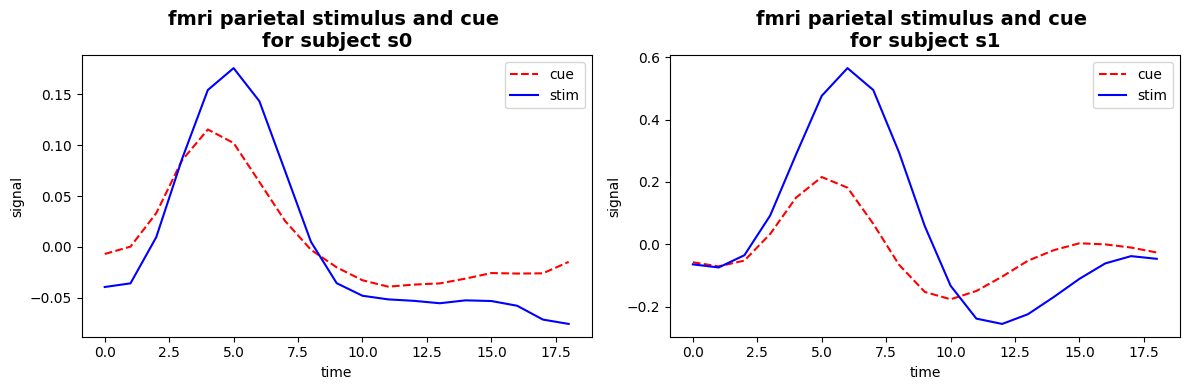

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i = 0
for s in ['s0','s1']:

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax[i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[i].set_title('fmri parietal stimulus and cue \nfor subject ' + s, fontsize=14, weight='bold')
  ax[i].set_xlabel('time')
  ax[i].set_ylabel('signal')
  ax[i].legend()

  i += 1

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib1_6.png')

Exercício 7 sharex, sharey
Produza um gráfico como abaixo agora para os sujeitos s0 a s3, em uma mesma figura empregando empregando o modo artist layer. Verifique no comando subplots() como compartilhar os eixos. Observe todos os demais elementos do gráfico.
Q. Quais sujeitos apresentam sinais mais intensos de estímulos?

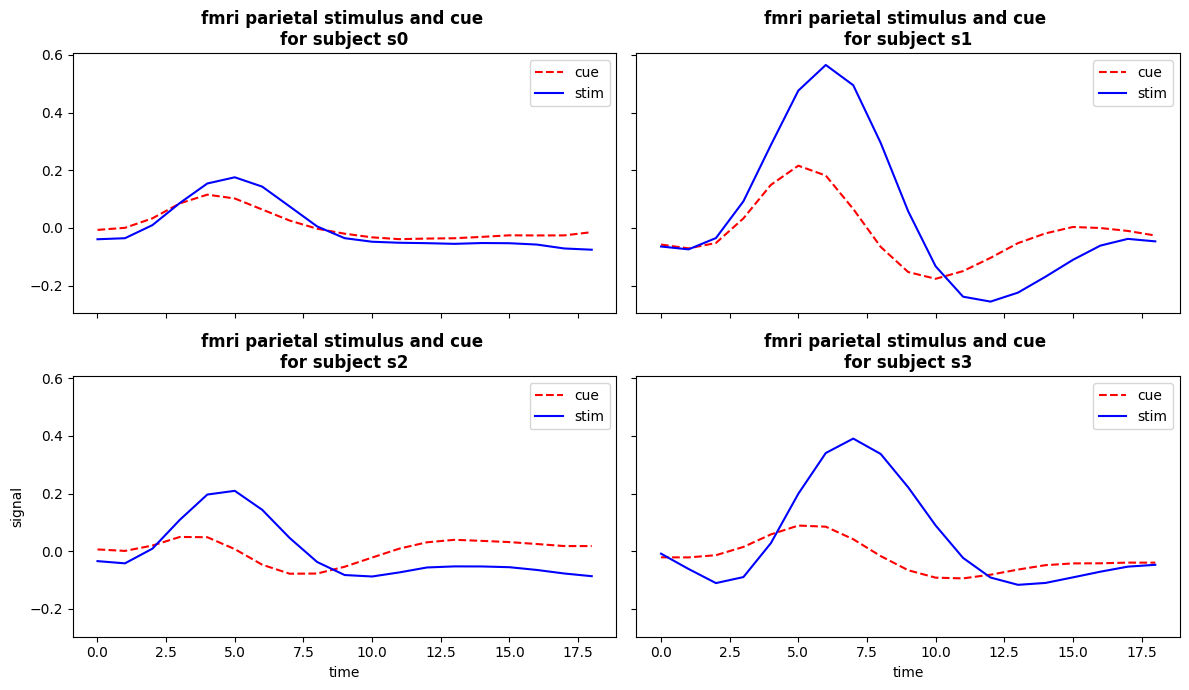

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,7),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i = 0
for s in ['s0','s1']:

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax[0,i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[0,i].set_title('fmri parietal stimulus and cue \nfor subject ' + s, fontsize=12, weight='bold')
  # ax[0,i].set_xlabel('time')
  if i == 0: ax[1,i].set_ylabel('signal')
  ax[0,i].legend()

  i += 1

i = 0
for s in ['s2','s3']:

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax[1,i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[1,i].set_title('fmri parietal stimulus and cue \nfor subject ' + s, fontsize=12, weight='bold')
  ax[1,i].set_xlabel('time')
  if i == 0: ax[1,i].set_ylabel('signal')
  ax[1,i].legend()

  i += 1

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib1_7.png')

## Subplots

plt.subplots(2, 2): This function creates a new figure and a grid of subplots. The arguments 2 and 2 specify the number of rows and columns in the grid, respectively. In this case, it creates a grid with 2 rows and 2 columns, resulting in a total of 4 subplots.

fig, ax = ...: The fig variable represents the entire figure, which serves as the overall container for one or more subplots. The ax variable is a NumPy array or a sequence of axes objects representing the individual subplots.

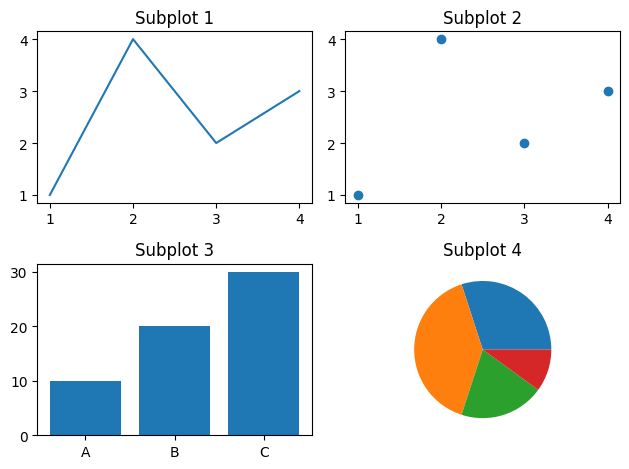

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

# Plotting on the first subplot
ax[0, 0].plot([1, 2, 3, 4], [1, 4, 2, 3])
ax[0, 0].set_title('Subplot 1')

# Plotting on the second subplot
ax[0, 1].scatter([1, 2, 3, 4], [1, 4, 2, 3])
ax[0, 1].set_title('Subplot 2')

# Plotting on the third subplot
ax[1, 0].bar(['A', 'B', 'C'], [10, 20, 30])
ax[1, 0].set_title('Subplot 3')

# Plotting on the fourth subplot
ax[1, 1].pie([30, 40, 20, 10])
ax[1, 1].set_title('Subplot 4')

plt.tight_layout()
plt.show()

## Exercicio Subplot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = sns.load_dataset('fmri')
df = df.sort_values('timepoint')
df.head()

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
258,s7,0,stim,parietal,0.004081
259,s6,0,stim,parietal,-0.023319
260,s5,0,stim,parietal,-0.051228
865,s5,0,cue,frontal,-0.027033


array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

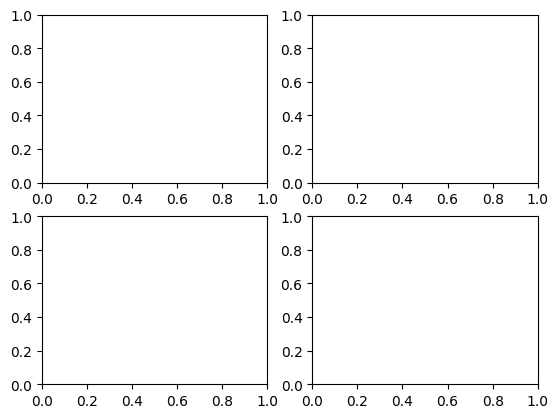

In [ ]:
fig, ax = plt.subplots(2,2)
ax


In [ ]:
ax.reshape(-1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [ ]:
( ax1, ax2 ) = ax
ax1

array([<Axes: >, <Axes: >], dtype=object)

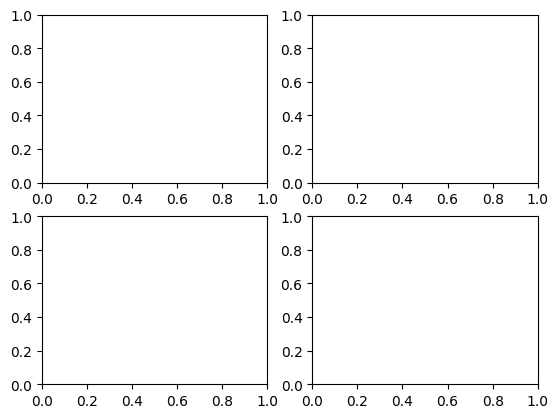

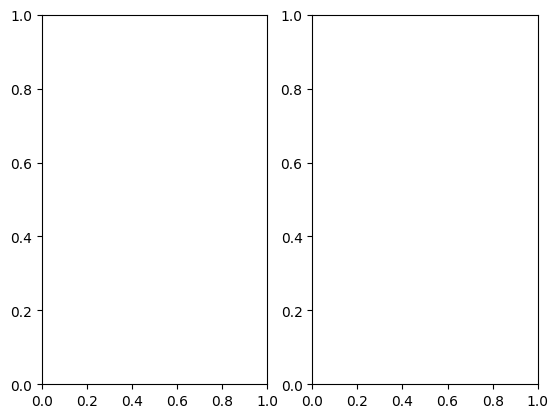

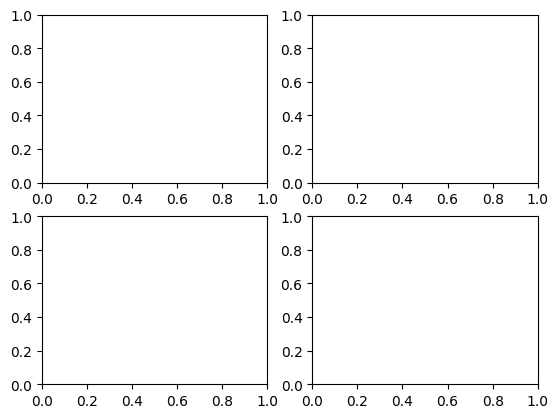

In [ ]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

### Exercício 1
Use algumas das formas acima para, partindo do último exercício da lista anterior, produzir um gráfico como abaixo para os sujeitos s0 a s8, empregando o modo artist layer e iterando sobre os elementos de ax. Observe todos os demais elementos do gráfico.

Q. Você pode concluir que todos os sinais, de estímulos e repouso, têm aproximadamente o mesmo comportamento para todos os sujeitos?

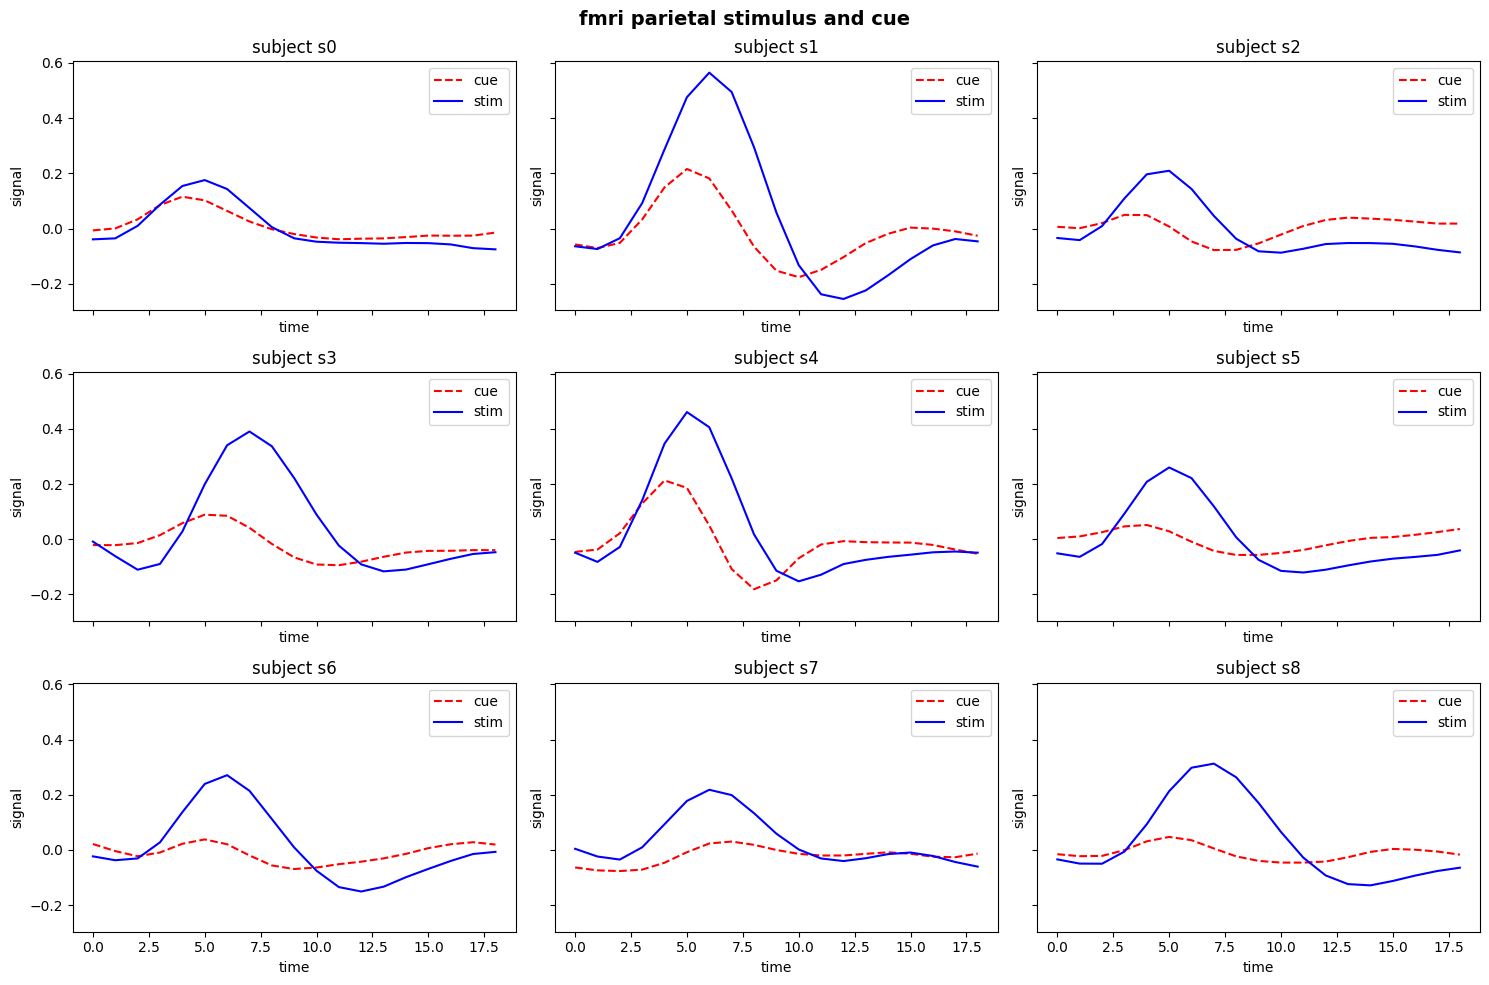

In [ ]:
fig, ax= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i_s = 0

for i in range(0,ax.shape[0]):
  for j in range(0,ax.shape[1]):

    s = 's' + str(i_s)

    for e in df.event.unique():
      mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
      ax[i,j].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    ax[i,j].set_title('subject ' + s, fontsize=12)
    ax[i,j].set_xlabel('time')
    ax[i,j].set_ylabel('signal')
    ax[i,j].legend()

    i_s = i_s + 1

  plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

fig, ax= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True): This line creates a figure and a grid of subplots with dimensions 3x3. The figsize parameter specifies the size of the figure in inches. sharex=True and sharey=True ensure that all subplots share the same x-axis and y-axis, respectively. The resulting figure object is assigned to fig, and the array of axes objects is assigned to ax.

linestyle = {'stim':'-','cue':'--'}: This line defines a dictionary linestyle with two entries, where the keys are 'stim' and 'cue', and the values are the respective line styles for plotting.

color = {'stim':'blue','cue':'red'}: This line defines a dictionary color with two entries, where the keys are 'stim' and 'cue', and the values are the respective colors for plotting.

i_s = 0: This line initializes a counter i_s with a value of 0.

The following nested loops iterate over the axes objects to plot the data:

The outer loop iterates over the rows of the ax array.
The inner loop iterates over the columns of the ax array.
s = 's' + str(i_s): This line creates a string s by concatenating the letter 's' with the value of i_s. This string is used to identify different subjects.

The subsequent loop iterates over unique values of the 'event' column in the DataFrame:

It creates a mask to filter rows in the DataFrame based on the subject (s), event (e), and region ('parietal').
It plots the 'timepoint' column against the 'signal' column for the filtered data using the appropriate color and linestyle based on the 'event' value.
It sets the subplot title to 'subject ' + s and adds x-axis and y-axis labels.
It adds a legend to the subplot.
i_s = i_s + 1: This line increments the subject counter i_s by 1 for the next iteration.

plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold'): This line sets a super title for the entire figure.

plt.tight_layout(): This line adjusts the spacing between subplots to improve readability.

plt.show(): This line displays the final figure with all the subplots.

Exercício 2
Acima você observou 9 sujeitos com o comportamento mais ou menos semelhante tanto nas situações de estímulo como repouso. Mas você pode fazer melhor e empregar toda a base para comparar os sinais com o sinal médio de todos os sujeitos. Faça isso neste exercício produzindo um gráfico como abaixo. Observe todos os demais elementos do gráfico.

Q. Quais sujeitos mais se assemelham e quais mais se distanciam do comportamento médio?

In [ ]:
df_mean = df.groupby(['timepoint','event','region']).signal.mean().reset_index()
df_mean.head()

,timepoint,event,region,signal
0,0,cue,frontal,-0.013137
1,0,cue,parietal,-0.023166
2,0,stim,frontal,-0.005349
3,0,stim,parietal,-0.024995
4,1,cue,frontal,-0.015612


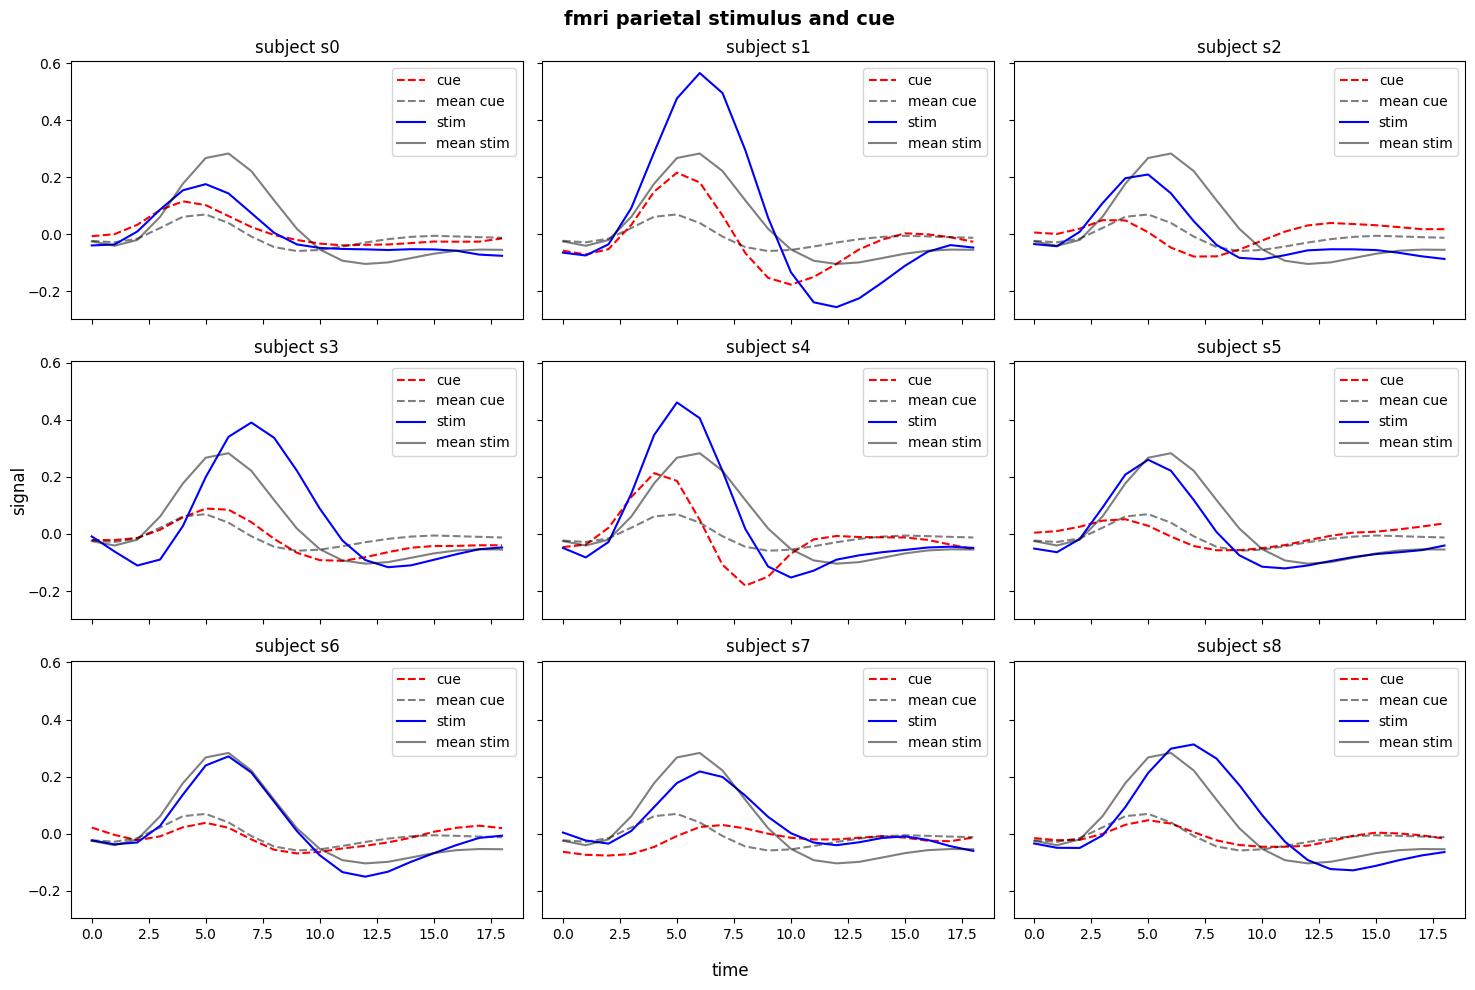

In [ ]:
fig, axis= plt.subplots(3,3,figsize=(15,10),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

for ax, s in zip(axis.reshape(-1),(['s' + str(x) for x in range(0,10)])):

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax.plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

    mask = (df_mean.event == e) & (df_mean.region == 'parietal')
    ax.plot(df_mean[ mask ].timepoint, df_mean[ mask ].signal, color='k', linestyle=linestyle[e], label='mean ' + e, alpha=0.5)

  ax.set_title('subject ' + s, fontsize=12)
  ax.legend()

plt.suptitle('fmri parietal stimulus and cue', fontsize=14, weight='bold')
fig.supxlabel('time')
fig.supylabel('signal')

plt.tight_layout()
plt.show()

### Case Yahoo

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import yfinance as yf

data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2018-10-01','2022-03-01')

df = data['Adj Close'].reset_index()
df.head()

[*********************100%***********************]  5 of 5 completed


,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,2018-10-01,4.0527,24.586113,7.764714,42.865032,78624.0
1,2018-10-02,4.0164,25.533028,8.437655,43.432785,81612.0
2,2018-10-03,3.9395,26.688494,8.796311,42.545673,83273.0
3,2018-10-04,3.9004,26.716673,8.881352,41.729534,82953.0
4,2018-10-05,3.8739,26.626499,8.859167,40.799850,82322.0


Pré Exercício
Os valores estão em reais. Crie para cada ticket de ação o valor em USD criando um novo atributo <ticket>_USD. Em seguida empregue a função pd.to_datetime() para converter o formato de Date.

[ ]


In [ ]:
for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  df[c + '_USD'] = df[c] / df['BRL=X']

df.head()

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD
0,2018-10-01,4.0527,24.586113,7.764714,42.865032,78624.0,6.066601,1.915936,10.576907
1,2018-10-02,4.0164,25.533028,8.437655,43.432785,81612.0,6.357193,2.100801,10.813860
2,2018-10-03,3.9395,26.688494,8.796311,42.545673,83273.0,6.774589,2.232850,10.799765
3,2018-10-04,3.9004,26.716673,8.881352,41.729534,82953.0,6.849727,2.277036,10.698783
4,2018-10-05,3.8739,26.626499,8.859167,40.799850,82322.0,6.873306,2.286886,10.531984


In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
#@markdown Must be True
((df.shape[1] == 9) and (df.Date.dtype == '<M8[ns]'))

True

Exercício 3
Produza um gráfico como abaixo.
Note que o eixo y é compartilhado. Depois de fazer uma primeira versão do seu gráfico você pode achar interessante consultar https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib para ver alternativas de como ajustar as escalas do eixo x.

Q. Qual ação teve maiores valores absolutos no período?

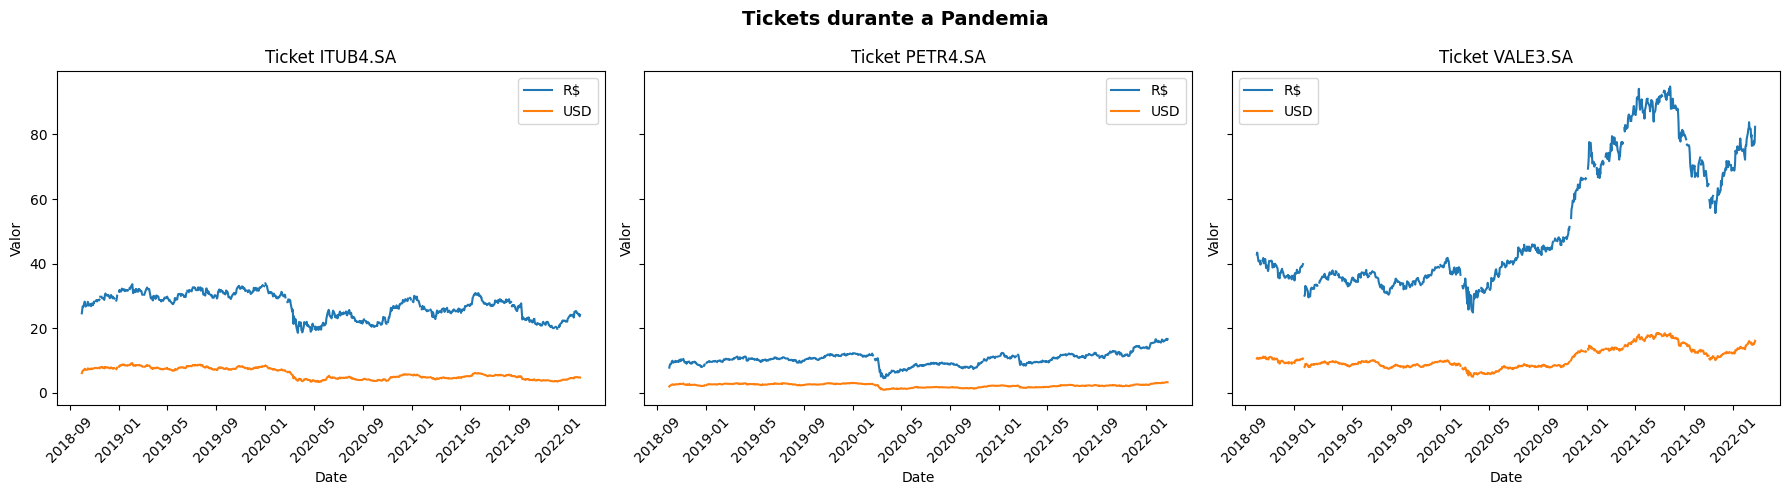

In [ ]:
fig, ax= plt.subplots(1,3,figsize=(18,5),sharey=True)

for ax, c in zip(ax,['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']):
  ax.plot(df.Date, df[c], label='R$')
  ax.plot(df.Date, df[c + '_USD'], label='USD')

  ax.set_title('Ticket ' + c, fontsize=12)
  ax.set_xlabel('Date')
  ax.set_ylabel('Valor')
  ax.legend()

  ax.tick_params(axis='x', rotation=45)

plt.suptitle('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Exercício 4

Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_4.png)

Basicamente, agora, você vai empregar duas escalas para o eixo y para representar valores em reais e em dólar.

Q. Para empregar dois eixos y compartilhados...*texto em itálico*

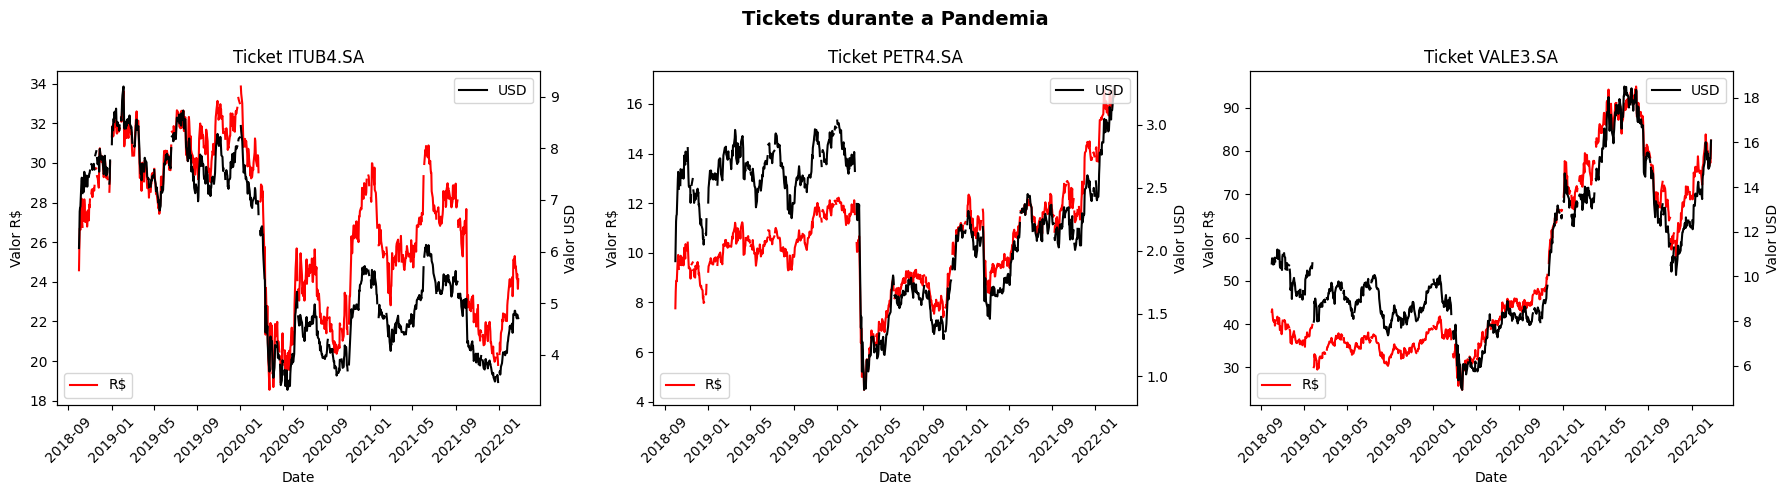

In [ ]:
fig, ax= plt.subplots(1,3,figsize=(18,5))

for ax, c in zip(ax,['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']):
  ax.plot(df.Date, df[c], color='r', label='R$')

  ax2 = ax.twinx()
  ax2.plot(df.Date, df[c + '_USD'], color='k', label='USD')

  ax.set_title('Ticket ' + c, fontsize=12)
  ax.set_xlabel('Date')
  ax.set_ylabel('Valor R$')
  ax2.set_ylabel('Valor USD')
  ax.legend(loc='lower left')
  ax2.legend(loc='upper right')

  ax.tick_params(axis='x', rotation=45)

plt.suptitle('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_5.png)

O primeiro eixo y apresenta valores em dólar dos ativos e o segundo eixo y os pontos do ibovespa.

Dica: use `legend(loc=...)`

Q. Qual ativo teve uma recuperação mais rápida do seu valor após a maior desvalorização no período observado?

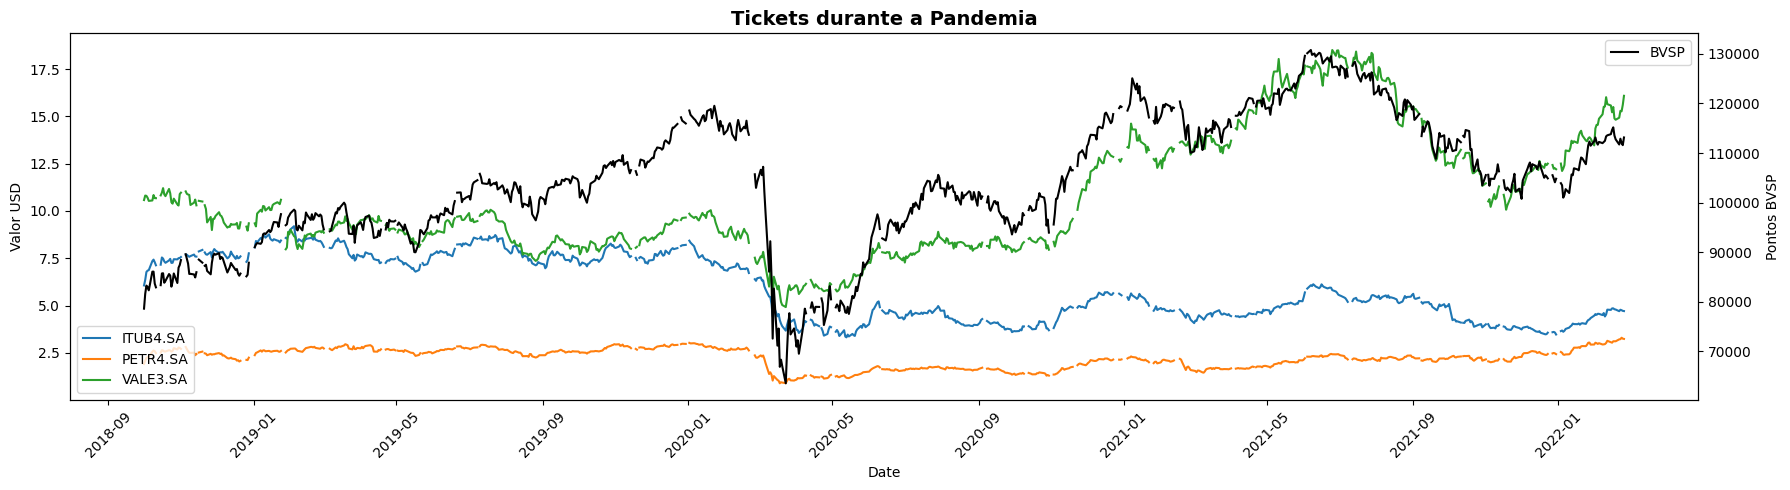

In [ ]:
fig, ax= plt.subplots(figsize=(18,5))


for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  ax.plot(df.Date, df[c + '_USD'], label=c)

ax2 = ax.twinx()
ax2.plot(df.Date, df['^BVSP'], color='k', label='BVSP')

ax.set_xlabel('Date')
ax.set_ylabel('Valor USD')
ax2.set_ylabel('Pontos BVSP')
ax.legend(loc='lower left')
ax2.legend(loc='upper right')

ax.tick_params(axis='x', rotation=45)

plt.title('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


Exercício 6
Produza um gráfico como abaixo buscando uma função do Pandas para substituir os valores ausentes por valores médios entre os pontos.

imagem

Adicione ainda uma linha vertical e um rótulo (texto) no ponto que o valor das ações indica o impacto da primeira onda de Covid no mercado brasileiro.

Dica: use legend(loc=...)

Q. Qual é a função do Pandas que substitui os valores ausentes por valores médios entre os pontos e qual ativo teve o maior ponto de desvalorização no gráfico anterior mais suavizado?

In [ ]:
df_interpolate = df.drop(columns='Date').interpolate()
df = pd.concat([ df.Date, df_interpolate ], axis=1)
df.head()

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD
0,2018-10-01,4.0527,24.586113,7.764714,42.865032,78624.0,6.066601,1.915936,10.576907
1,2018-10-02,4.0164,25.533028,8.437655,43.432785,81612.0,6.357193,2.100801,10.813860
2,2018-10-03,3.9395,26.688494,8.796311,42.545673,83273.0,6.774589,2.232850,10.799765
3,2018-10-04,3.9004,26.716673,8.881352,41.729534,82953.0,6.849727,2.277036,10.698783
4,2018-10-05,3.8739,26.626499,8.859167,40.799850,82322.0,6.873306,2.286886,10.531984


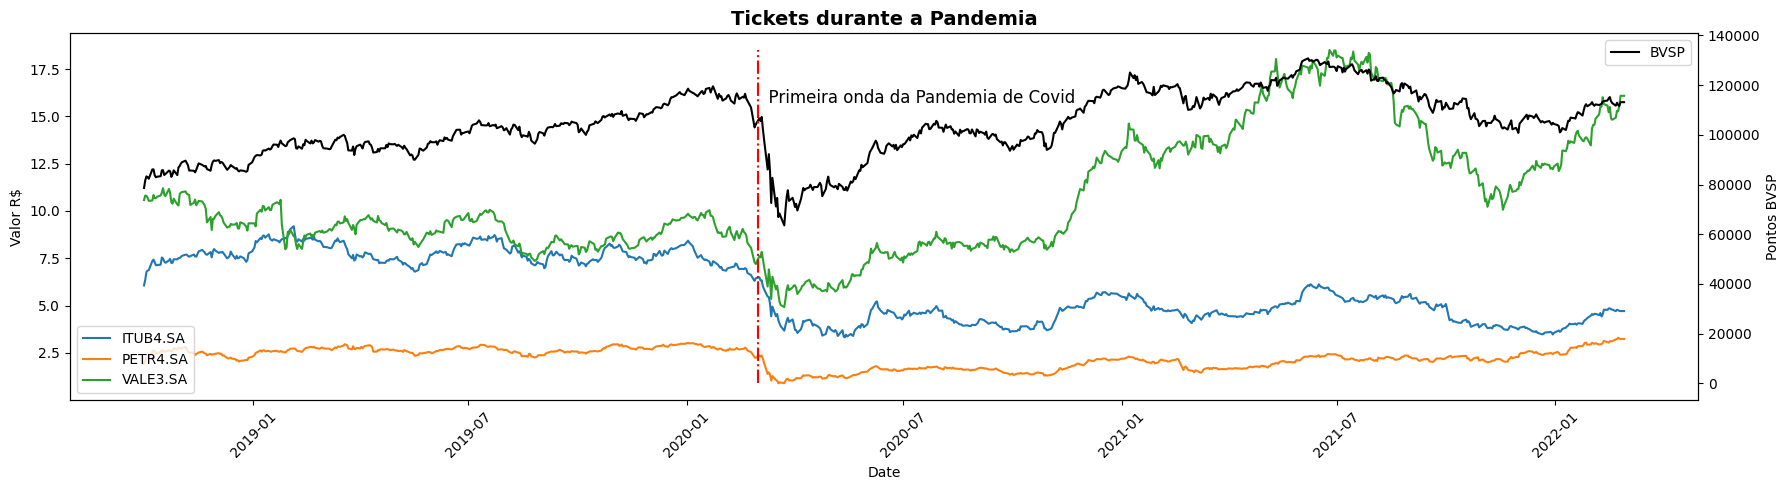

In [ ]:
fig, ax= plt.subplots(figsize=(18,5))

for c in ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']:
  ax.plot(df.Date, df[c + '_USD'], label=c)

ax2 = ax.twinx()
ax2.plot(df.Date, df['^BVSP'], color='k', label='BVSP')

ax.set_xlabel('Date')
ax.set_ylabel('Valor R$')
ax2.set_ylabel('Pontos BVSP')
ax.legend(loc='lower left')
ax2.legend(loc='upper right')

ax.tick_params(axis='x', rotation=45)

plt.title('Tickets durante a Pandemia', fontsize=14, weight='bold')

plt.vlines( pd.to_datetime('2020-03-01') , 0, ax2.get_ylim()[1], color='r', linestyle='-.' )
plt.text( pd.to_datetime('2020-03-01') , 4* ax2.get_ylim()[1] / 5, '  Primeira onda da Pandemia de Covid', fontsize=12 )

plt.tight_layout()
plt.show()

### Loc
Retorna as linhas que voce pedir
df.loc[1:3] #retorna index de 1 a 3

## Guia Prático de Distribuições e Teste de Hipóteses

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 3)

Gerando dados de uma distribuição Normal
rvs(loc=0, scale=1, size=1, random_state=None)

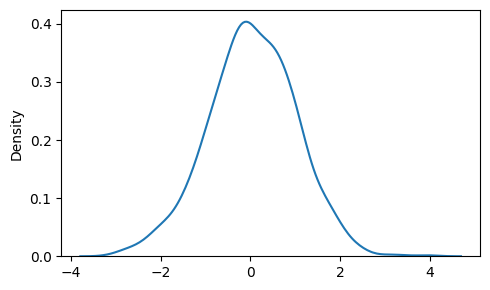

In [ ]:
from scipy.stats import norm
values = norm.rvs(loc=0,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

sns.kdeplot(x=values,ax=ax)

plt.tight_layout()
plt.show()

# Regressão Linear

In [ ]:
def Celsius2Fahrenheit(Celsius):
  return Celsius * 9/5 + 32

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.DataFrame()
df['celsius'] = np.arange(-20,60)
df['fahrenheit'] = Celsius2Fahrenheit( df['celsius'] )
df.head()


,celsius,fahrenheit
0,-20,-4.0
1,-19,-2.2
2,-18,-0.4
3,-17,1.4
4,-16,3.2


Se tivermos um conjunto de dados com valores de temperaturas em  oC  (Celsius) e seus respectivos valores em  oF  (Fahrenheit), podemos criar um programa que aprende esse padrão e empregá-lo para a conversão de novos dados.

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['celsius']]
y = df['fahrenheit']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

O programa acima cria um modelo (um modelo linear) para os dados. Esse modelo busca capturar o padrão dos dados, isto é, a regra que leva os valores de  oC  (Celsius)  →   oF  (Fahrenheit), e cria um programa com essa regra que pode ser aplicado a novos valores.

In [ ]:
Fahrenheit_prediction = regressor.predict(pd.DataFrame({'celsius':[0,27]}))
print(Fahrenheit_prediction)

[32.  80.6]


Agora, nosso novo programa regressor, converte as temperaturas da mesma forma que o programa Celsius2Fahrenheit onde explicitamente codificamos a regra de conversão de Celsius para Fahrenheit, mas criamos esse programa unicamente a partir de dados, sem conhecermos explicitamente a regra de conversão.

In [ ]:
# The coefficients
print("Coefficients: \n", regressor.coef_, regressor.intercept_)

Coefficients: 
 [1.8] 32.0


Nosso `regressor` é um modelo de regressão linear, um dos modelos de Aprendizado de Máquina mais simples, e que mapeia dados de entrada e saída na forma de uma equação linear.

$$ y = a_0 + a_1 x $$

O *aprendizado* consiste em encontrar, nesse modelo, os coeficientes que melhor se ajustam aos dados e você pode notar que os coeficientes obtidos são exatamente os mesmos da nossa fórmula colocada explicitamente no nosso código `Celsius2Fahrenheit`.

$$ y = 32 + 1.8 x \space \Rightarrow \space ^{o}C = 32 + \frac{5}{9} \times ^{o}F $$

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['fahrenheit']]
y = df['celsius']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
Celsius_prediction = regressor.predict(pd.DataFrame({'fahrenheit':[32,80.6]}))
print(Celsius_prediction)

[ 0. 27.]


O mesmo programa regressor pode ser empregado para outras transformações de temperatura, como de Kelvin  ↔  Fahrenheit  ↔  Celsius, bastando para isso termos essas respectivas temperaturas.

In [ ]:
df['kelvin'] = (df['fahrenheit'] - 32) * 5/9 + 273.15

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['celsius']]
y = df['kelvin']

regressor = LinearRegression()
regressor.fit(X, y)

Kelvin_prediction = regressor.predict(pd.DataFrame({'celsius':[27,0]}))
print(Kelvin_prediction)

[300.15 273.15]



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/SUPERVISIONADO_E_REFORCO.png" width=800, align="center">

Aprendizado não supervisionado

Modelos de aprendizagem não supervisionados são empregados vários tipos de tarefas ou problemas e os principais são: agrupamentos (ou clusterização), associações, redução de dimensionalidade e detecção de anomalias.

Os modelos de Clustering permitem agrupar dados não rotulados com base em suas semelhanças ou diferenças e são empregados em problemas de segmentação de clientes, produtos etc. Algoritmos de Associação, podem ser usados ​​para análise de cesta de compras ou sistemas de recomendação e permitem identificar que, clientes que compram um determinado item, também são propensos a comprar outro. Algoritmos como PCA (Principal Component Analysis), permitem reduzir a dimensionalidade de dados centenas ou milhares de atributos para facilitar uma análise dos dados. E modelos de detecção de anomalia, permitem identificar um comportamento suspeito de tráfego de internet em um site, indicando uma falha do sistema ou uma tentativa de deny-of-service, ou ainda detectar um movimento em uma câmera de segurança.


<img src="https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/NaoSupervisionado.png?raw=true" width=900, align="center">


Aprendizado de Reforço
O aprendizado de reforço se utiliza de um sistema com um fator de recompensa para o aprendizado. O treinamento ocorre por meio de tentativa e erro estabelecendo-se um sistema de recompensa. Um agente toma uma sequência de decisões na busca de atingir uma meta (o problema que se deseja resolver). As ações que resultam em se aproximar da meta são recompensadas, e ações que se afastam da meta são penalizadas. O agente, desse modo, vai aprendendo e se aproximando da solução do problema ao maximizar a recompensa total que pode ser, por exemplo, obter um máximo de pontos em um jogo.Esse tipo de aprendizado é empregado principalmente em robótica e robôs-aspirador implementam modelos simples desse tipo de aprendizado.

Exemplo regrassão

In [ ]:
import pandas as pd

dados = pd.DataFrame({'X':[1,2,3,4,5],'Y':[1.3,1.8,3.5,4,4.6]})
dados.head()

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6


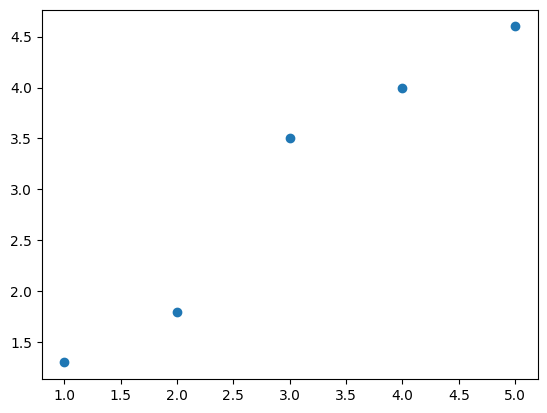

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
#criando regressor
reg = LinearRegression().fit(dados.X.values.reshape(-1,1),dados.Y)

In [ ]:
#Coeficiente angular
a =reg.coef_

In [ ]:
#Coeficiente linear
b= reg.intercept_

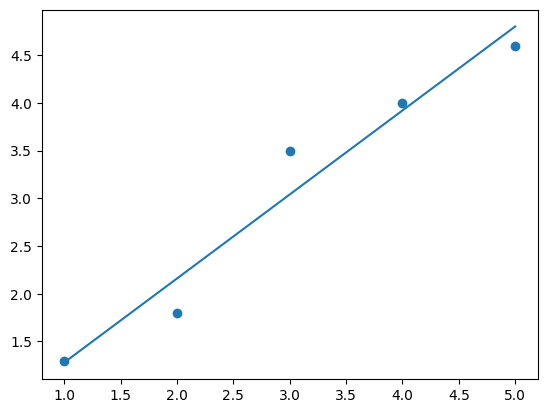

In [ ]:
#visualizando graficamente

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)

x = dados.X.values
y = a*x+b

ax.plot(x,y)

plt.show()

In [ ]:
#fazendo previsao
reg.predict(dados.X.values.reshape(-1,1))

dados['y_pred'] =reg.predict(dados.X.values.reshape(-1,1))

dados

,X,Y,y_pred
0,1,1.3,1.28
1,2,1.8,2.16
2,3,3.5,3.04
3,4,4.0,3.92
4,5,4.6,4.80


In [ ]:
#calculando erro
from sklearn.metrics import mean_squared_error
mean_squared_error(dados.Y,dados.y_pred)

0.07760000000000003

Regressão e Classificação
O Aprendizado Supervisionado normalmente envolve dois tipos de problemas, problemas de Regressão e problemas de Classificação. Em ambos os casos você possui um conjunto de dados de treinamento com exemplos de entradas e saídas. Nos problemas de Regressão os rótulos dos dados (as saídas) são valores contínuos como o preço de imóveis ou a quantidade de clicks em página Web, sendo essas as quantidades que você quer prever para novos valores de entrada (por exemplo, uma data futura). Já nos problemas de Classificação os rótulos dos dados são valores discretos como [Yes, No], [True, False], [Safe, Unsafe, Dangerous], [Fraud, Not Fraud] ou ainda [Dogs, Cats, Fishes, Others] em um conjunto de fotos de animais domésticos. Vamos empregar aqui dois exemplos de brinquedo apenas para você se familiarizar com esses modelos e entender a diferença.

Exemplo de Regressão: Grilos e Temperatura
Grilos gorjeiam com mais frequência em dias quentes que em dias freios e profissionais e amadores coletaram dados sobre o gorjeio desses insetos por minuto e as temperaturas chegando a modelo linear que permite, através do número de gorjeios por minuto (a variável ou atributo preditor) estimar a temperatura (o rótulo, ou a variável objetivo). Os dados a seguir simulam esses dados.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

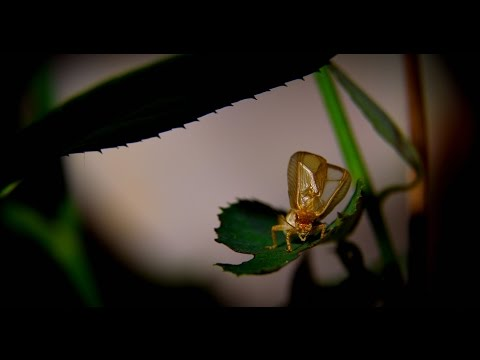

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo')

In [ ]:
np.random.seed(1)
df = pd.DataFrame()

df['temperature'] = np.arange(0,45,1)
df['chirps'] = (20 * df['temperature'] - 4) / 16
df['chirps'] = df['chirps'] + np.round(np.random.sample(len(df))*5,0)

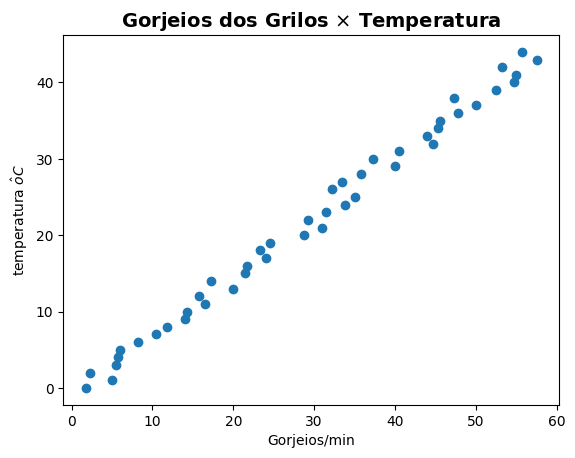

In [ ]:
plt.scatter(df['chirps'],df['temperature'])

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

Como você pode ver os dados se aproximam bastante de uma 'reta', um modelo linear, e podemos esperar escrever algo como:

$$ \text{Temperatura} = a_0 + a_1 \times \text{Gorjeios/min} $$

Que é a equação de uma reta.

Modelos de regressão podem ser ainda polinomiais, exponenciais etc., (diferentes classes de modelos de regressão), mas  escolhemos um modelo linear para aproximar os dados por quê observando os dados *esperamos* poder aproximá-los por uma reta! Os modelos lineares é a classe de modelos de regressão que escolhemos para aproximar nossos dados.

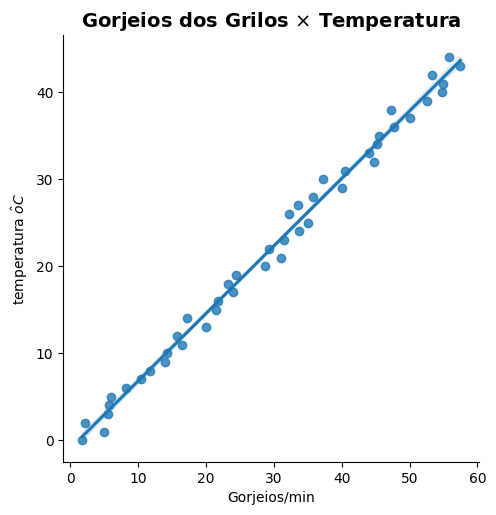

In [ ]:
sns.lmplot(x='chirps',y='temperature', data=df)

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

Um modelo de regressão linear busca encontrar a reta que melhor se ajusta a esse conjunto de dados calculando os melhores coeficientes  a0  e  a1  que tornam os valores  Temperatura  mais próximos dos valores reais.

In [ ]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='temperature ~ chirps', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5334.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           9.94e-47
Time:                        18:41:14   Log-Likelihood:                -70.585
No. Observations:                  45   AIC:                             145.2
Df Residuals:                      43   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9595      0.361     -2.659      0.0

Por hora, note apenas que os resultados do modelo acima mostram os coeficientes obtidos, `Intercept` e `chirps`. O  `Intercept` é o coeficiente livre da equação da reta que não está associado a qualquer variável preditora e recebe este nome por ser o valor que 'intercepta' o eixo $y$ quando os valores de todas as variáveis preditoras é nulo. `chirps` é o coeficiente dos gorjeios.

$$ \text{Temperatura} = -0.9595 + 0.7761 \times \text{Gorjeios/min} $$

E podemos empregar essa expressão para estimar a temperatura no caso de observarmos 32 gorjeios por minuto,

In [ ]:
Gorjeios_Observados = pd.DataFrame({'chirps': [32]})
Temperatura_Estimada = lm.predict(Gorjeios_Observados)[0]

print(f'{Temperatura_Estimada:.2f} oC')

23.88 oC


## Exercicio Regressão

Exercício
Construa os modelos abaixo e para cada modelo calcule o comprimento de pétala para um exemplar que tenha todas medidas 10% acima da média de medida de sua espécie.

Determine a melhor regressão linear simples para determinar comprimento de pétalas a partir dos demais atributos numéricos
Determine a melhor regressão múltipla para determinar comprimento de pétalas empregando somente aributos numéricos
Inclua no modelo anterior o artibuto species
Vamos começar empregando a biblioteca statsmodel.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path_data = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'

Exercício
Construa os modelos abaixo e para cada modelo calcule o comprimento de pétala para um exemplar que tenha todas medidas 10% acima da média de medida de sua espécie.

Determine a melhor regressão linear simples para determinar comprimento de pétalas a partir dos demais atributos numéricos
Determine a melhor regressão múltipla para determinar comprimento de pétalas empregando somente aributos numéricos
Inclua no modelo anterior o artibuto species
Vamos começar empregando a biblioteca statsmodel.

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
import statsmodels.formula.api as sm

lm1 = sm.ols(formula='petal_length ~ sepal_length', data=iris)
lm1 = lm1.fit()
print(lm1.summary())

lm2 = sm.ols(formula='petal_length ~ sepal_width', data=iris)
lm2 = lm2.fit()
print(lm2.summary())

lm3 = sm.ols(formula='petal_length ~ petal_width', data=iris)
lm3 = lm3.fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.04e-47
Time:                        18:58:39   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.1014      0.507    -14.016   

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X_test = iris.groupby('species')[['petal_width']].mean() * 1.1
X_test

,petal_width
species,
setosa,0.2706
versicolor,1.4586
virginica,2.2286


In [ ]:
lm3.predict(X_test)

species
setosa        1.686980
versicolor    4.336149
virginica     6.053203
dtype: float64

In [ ]:
lm4 = sm.ols(formula='petal_length ~ sepal_length + sepal_width + petal_width - 1', data=iris)
lm4 = lm4.fit()
print(lm4.summary())

                                 OLS Regression Results                                
Dep. Variable:           petal_length   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              8426.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                   3.14e-164
Time:                        19:02:10   Log-Likelihood:                         -39.808
No. Observations:                 150   AIC:                                      85.62
Df Residuals:                     147   BIC:                                      94.65
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
lm5 = sm.ols(formula='petal_length ~ sepal_length + sepal_width + petal_width + species', data=iris)
lm5 = lm5.fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1317.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          2.88e-118
Time:                        19:02:40   Log-Likelihood:                -9.2833
No. Observations:                 150   AIC:                             30.57
Df Residuals:                     144   BIC:                             48.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.11

## Construindo o modelo linear, `sm.ols(formula = , data= )`

A função `sm.ols()` (ordinary least squares, se refere ao método de otimização empregado) requer um conjunto de treinamento e um parâmetro `formula` (*patsy* fórmula, um formato bastante empregado em modelos) que indica a variável dependente (objetivo) e as variáveis independentes (preditoras) do modelo.

````
                                                              formula = 'y ~ x'
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + a_1 x $$


Vamos gerar uma amostra de 50 valores "aleatórios" a partir de uma função linear.

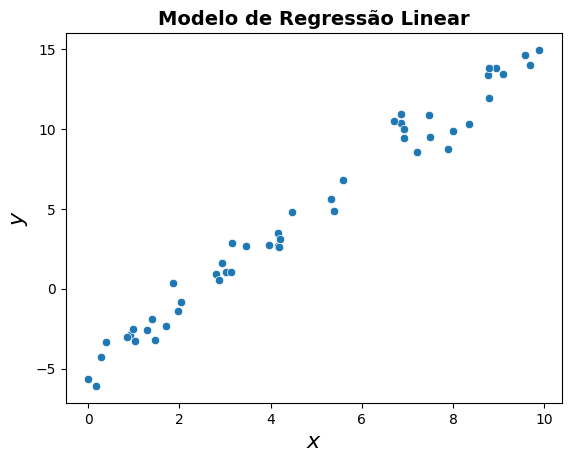

,x,y
0,4.170220,2.653267
1,7.203245,8.561284
2,0.001144,-5.668959
3,3.023326,1.033987
4,1.467559,-3.182193


In [ ]:
import statsmodels.formula.api as sm
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x=x, y=y)

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()


df = pd.DataFrame({'x':x,'y':y})
df.head()

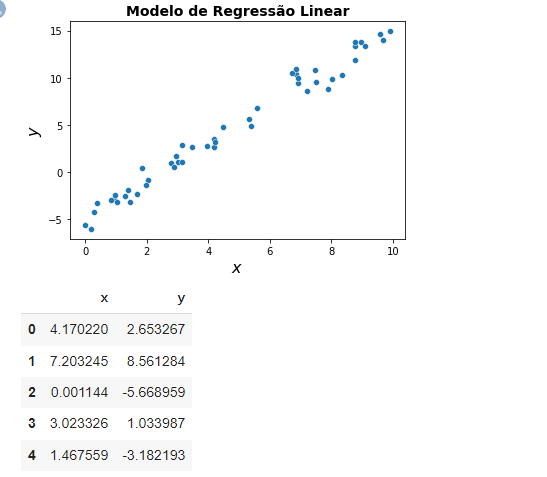

In [ ]:
# Define o modelo
model = sm.ols(formula='y ~ x', data=df)

E em seguida fazer o ajuste, *fit*, do modelo aos dados. É o treinamento ou aprendizado do modelo.

In [ ]:
# Treinamento
result = model.fit()


O método summary() apresenta, então, vários resultados do modelo.

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           5.71e-42
Time:                        19:40:29   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

Observando os coeficientes no sumário do modelo acima vemos que o modelo de aproximação linear é dado por:

$$ \hat y = -4.9986 + 2.0272 x $$

E podemos empregar o modelo para estimar   valores de $y$, isto é $\bar y$ (`predicted`), e  comparar seus valores.


In [ ]:
df['predicted'] = result.predict(df.x)

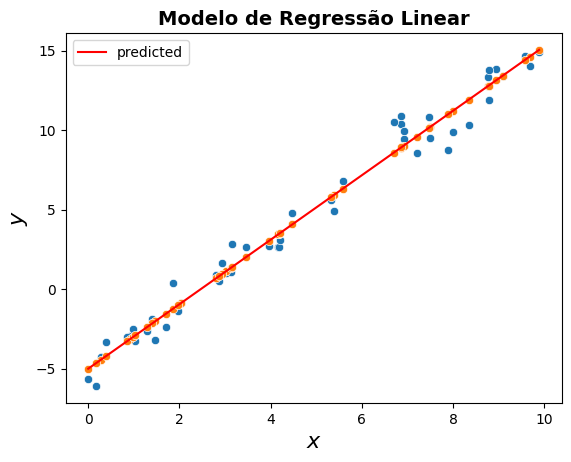

In [ ]:
sns.scatterplot(x='x',y='y',data=df)
sns.scatterplot(x='x',y='predicted',data=df)
sns.lineplot(x='x',y='predicted',data=df,color='red', label='predicted')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)

plt.legend()
plt.show()

## Analisando a Eficiência do Modelo

O Sumário acima ainda traz o Coeficiente de Determinação e os *p-values* dos coeficientes. O primeiro você já conhece e é uma medida geral da eficiência do modelo.

$$ R^2 = 0.979 $$

Esse é um valor bastante próximo de 1 e que garante termos um modelo que explica bastante bem os dados.

Outra medida importante de se observar são os $p-values$ dos coeficientes. Eles são um teste de hipótese sobre os valores dos coeficientes onde a hipótese nula é de que os coeficientes são não significativos ($= 0$). A hipótese alternativa é de que o coeficiente é significativo (e, portanto $\ne 0$). Assim, $ p-values < 0.05 $ indicarão que o coeficiente é significativo para o modelo e podemos observar que para os dois coeficientes acima (`Intercept` e `x`) os valores são significativos.

$$ p-value(a_i) < 0.05 \Rightarrow a_i \space \text{é Significativo} $$

Podemos assim, dizer que

$$ \hat y = -4.9986 + 2.0272 x $$

é um modelo que aproxima bastante bem os dados.

Existem várias outras métricas nos resultados acima, mas para os nossos propósitos a análise acima já é suficiente.

> **$R^2$ qual é um bom valor? Novamente não existe um modelo 'certo' e a questão é melhor formulada em termos de: qual é um bom resultado para os seus propósitos? Mas de modo geral valores $R^2 > 0.8$ já são bastante úteis mesmo para predições e com valores abaixo $R^2 < 0.6$ recomendaríamos buscar outros modelos de aproximação dos dados.**


## CASO: Estimando o Preço de Veículos
Vamos empregar agora um conjunto de dados mais interessante e estimar o Preço de veículos com base em suas características. Vamos empregar o seguinte conjunto de dados:

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv",index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Preparação dos Dados
A Fase de Preparação dos Dados difere caso a caso, mas um princípio geral é nesta fase precisamos preparar o dado da melhor forma para que sejam aplicados os modelos. É uma boa prática, senão obrigatório, uma exploração dos dados para que você conheça os dados antes de aplicar os modelos.

Aqui a api statsmodels.formula.api não suporta nome de atributos com '.' e precisamos adequar o nomde dos atributos antes de aplicar o modelo

In [ ]:
df.columns = [ x.replace('.','') for x in df.columns ]

In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
A avaliação de valores ausentes é uma boa prática,

In [ ]:
df.isnull().sum()

Manufacturer         0
Model                0
Type                 0
MinPrice             0
Price                0
MaxPrice             0
MPGcity              0
MPGhighway           0
AirBags              0
DriveTrain           0
Cylinders            0
EngineSize           0
Horsepower           0
RPM                  0
Revpermile           0
Mantransavail        0
Fueltankcapacity     0
Passengers           0
Length               0
Wheelbase            0
Width                0
Turncircle           0
Rearseatroom         2
Luggageroom         11
Weight               0
Origin               0
Make                 0
dtype: int64

Mas os valores ausentes neste caso não impactam nossos modelos (eles não serão variáveis nem dependente e nem independentes no modelo).

### Regressão Linear Simples
Inicialmente vamos empregar somente variáveis numéricas para estimar o Preço, Price, dos veículos começando por um modelo de regressão linear simples empregando apenas a potência do motor, Horsepower, como variável preditora.

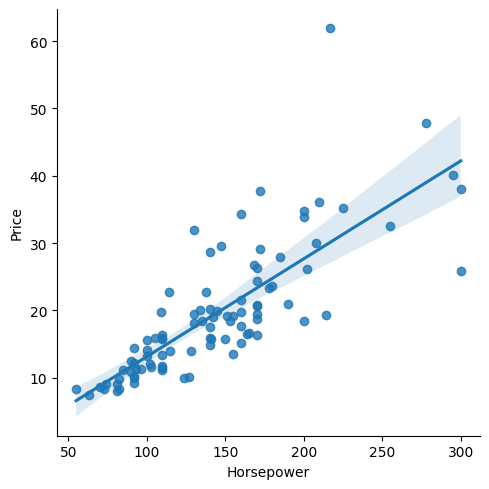

In [ ]:
sns.lmplot(x='Horsepower',y='Price',data=df)
plt.show()

Vamos, portanto, tentar inicialmente determinar o preço a partir somente da potência dos veículos, isto é:


$$ \hat{Price} =  a_0 + a_1 \text{Horsepower} $$



In [ ]:
model = sm.ols(formula="Price ~ Horsepower", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.84e-21
Time:                        19:50:43   Log-Likelihood:                -297.23
No. Observations:                  93   AIC:                             598.5
Df Residuals:                      91   BIC:                             603.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3988      1.820     -0.769      0.4

Obtemos assim o modelo:

$$ \hat{Price} =  -1.3988 + 0.1454 \times \text{Horsepower} $$

### Predição de novos valores, predict(x)
Podemos agora empregar nosso modelo para estimar o preço de um novo veículo para o qual conhecemos a potência:

In [ ]:
x = pd.DataFrame({'Horsepower': [150,180]})
result.predict(x)

### Avaliando o Modelo
Sendo uma regressão simples podemos fazer uma inspeção visual do modelo.

In [ ]:
df['predicted'] = result.predict()

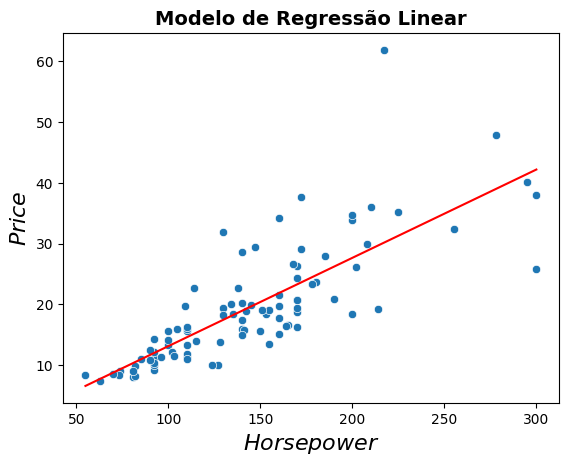

In [ ]:
sns.scatterplot(x='Horsepower', y='Price', data=df)
sns.lineplot(x='Horsepower', y='predicted', data=df, color='red')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$Horsepower$', fontsize=16)
plt.ylabel('$Price$', fontsize=16)

plt.show()

Os dados parecem se ajustar muito parcialmente aos dados. Mas a inspeção visual é bastante limitada e, no máximo, pode permitir a avaliação de modelos de regressão simples, em duas dimensões.

### Analisando o $R^2$ e *p-values*

$$ R^2 = 0.621$$
$$ p-values = 0.444 > 0.05 \text{, para o intercept}$$

A análise do coeficiente de determinação e do *p-value* dos coeficientes é uma forma mais efetiva de avaliação e pode ser aplicada também a modelos de regressão múltipla (com mais de uma variável preditora). Os valores também mostram que os dados se ajustam de modo bastante parcial ao modelo, que explica somente 62.1% da variação dos dados havendo ainda um coeficiente (*intercept*) não significativo para o modelo. O intervalo de confiança seria ainda uma verificação adicional e fornece o intervalo de valores de cada coeficiente, e que podemos empregar para identificar possíveis desvios nos coeficientes.

## Regressão Múltipla: Adicionando Mais Variáveis ao Modelo
Sendo o ajuste do modelo anterior parcial vamos buscar aprimorar o modelo adicionando mais variáveis preditoras. Vamos, entretanto, ainda nos atermos a entradas numéricas no modelo.

In [ ]:
model = sm.ols(formula="Price ~ Passengers +	Length +	Wheelbase	+ \
              Width	+ Turncircle + Luggageroom + \
              Weight + Horsepower + EngineSize + \
              RPM + Wheelbase ", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     18.94
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           2.32e-16
Time:                        19:53:51   Log-Likelihood:                -251.04
No. Observations:                  82   AIC:                             524.1
Df Residuals:                      71   BIC:                             550.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.1792     28.749      1.850      

A inspeção visual agora não é mais possível mas podemos analisar as métricas do modelo. O modelo agora apresenta um resultado melhor, mas ainda assim parcial.

$ \bar{R}^2 = 0.689 $, note, estamos vendo agora o $\bar{R}^2$ **ajustado**!

$ p-values > 0.05 $

O $\bar{R}^2$, ajustado, ainda é bastante inferior a $0.8$ (um valor a partir do qual as predições começam a ficar interessantes) e ainda existem estimadores não sigficantes, incluindo o `Intercept`.

Um modelo melhor pode ser obtido. Vamos empregar agora somente os estimadores relevantes, e empregaremos o $-1$ na fórmula para excluir o `Intercept` do modelo.

In [ ]:
model = sm.ols(formula="Price ~ Wheelbase	+ Width	+ Horsepower - 1", data=df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              476.8
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                    4.19e-55
Time:                        19:55:13   Log-Likelihood:                         -286.90
No. Observations:                  93   AIC:                                      579.8
Df Residuals:                      90   BIC:                                      587.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Conseguimos agora um modelo que parece suficientemente bom e que explica mais de 93% da variação dos preços dos veículos.

$$ \bar{R}^2 = 0.939 $$
$$ p-values < 0.05 $$

Este é um modelo bastante bom e que podemos agora empregar para fazer predições de preços de uma forma mais ou menos segura. Podemos, por exemplo, estimar o preço de um veículo hipotético com as medidas médias de `Wheelbase`,`Width` e `Horsepower`.

In [ ]:
x = pd.DataFrame({'Wheelbase': [ df.Wheelbase.mean() ],
                  'Width': [ df.Width.mean() ],
                  'Horsepower': [ df.Horsepower.mean() ]})
preco_estimado = result.predict(x)[0]

print(f'Preço estimado (US$ 1000): {preco_estimado:.2f}')

Preço estimado (US$ 1000): 19.48


## Adicionando Variáveis Categóricas

O pacote `statsmodel` permite empregar variáveis categóricas diretamente. Como o cálculo dos coeficientes requer atributos numéricos o pacote transforma esses atributos internamente fazendo o *hot encode* dos dados.

In [ ]:
model = sm.ols(formula="Price ~ Origin + Wheelbase + Width	+ Horsepower - 1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     53.85
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           7.17e-23
Time:                        19:57:56   Log-Likelihood:                -284.82
No. Observations:                  93   AIC:                             579.6
Df Residuals:                      88   BIC:                             592.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Origin[USA]        -0.2091     14.536     

Por exemplo, ao incluir o atributo categórico `Origin`, que possui valores `USA` e `non-USA`, o pacote cria as variáveis binárias (*hot encode*) `Origin[USA]` e `Origin[non-USA]` para serem empregadas no modelo. Aqui o modelo apresentou um resultado pior que o modelo anterior, mas seu  objetivo aqui é apenas de mostrar o uso de atributos categóricos em um modelo de regressão.

O uso de variáveis categóricas é muito importante em várias aplicações de modelos de regressão e você pode, por exemplo, pensar na importância de um atributo categórico como *bairro* ou *marca* para a estimativa de preços de imóveis ou veículos.

### Erros Comuns na Interpretação do Modelo
Dois erros são bastante comuns na intepretação de modelos de regressão linear e nos dois casos, podem levar a conclusões bastante errôneas.


## $R^2 \approx  0 \Rightarrow $ não há relação entre os dados.

Isso não é necessariamente verdade.

In [ ]:
data = pd.DataFrame()
data['x'] = np.arange(-10,10,0.1)
data['y'] = data['x']**2

model = sm.ols(formula="y ~ x", data=data)
result = model.fit()
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.07426
Date:                Mon, 19 Jun 2023   Prob (F-statistic):              0.786
Time:                        20:29:37   Log-Likelihood:                -962.77
No. Observations:                 200   AIC:                             1930.
Df Residuals:                     198   BIC:                             1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.3300      2.119     15.731      0.0

A regressão acima tem  R2=0 , mas os dados tem uma clara relação como mostra o gráfico.

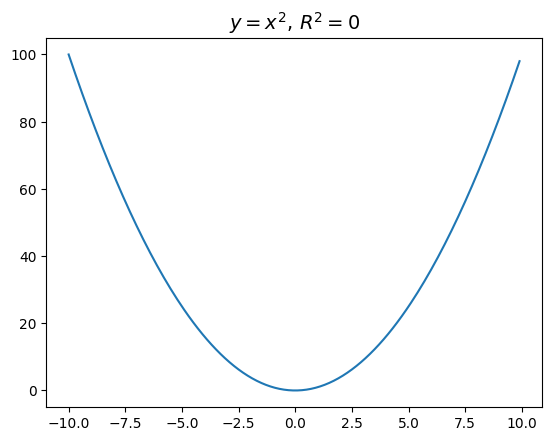

In [ ]:
plt.plot(data['x'],data['y'])
plt.title('$y = x^2$, $R^2 = 0$',fontsize=14)
plt.show()

O coeficiente  R2  indica somente a presença de relações lineares entre os dados podendo haver muitas outras relações que não as relações lineares como mostra o exemplo acima.

## $R^2 \approx 1 \Rightarrow $ então $x$ é **causa** e $y$ **efeito**.

Isso não é necessariamente verdade.

Talvez ainda mais comum que o erro anterior e até mais grave é concluírmos a partir de uma regressão linear válida uma relação de **causa-efeito** entre essas variáveis, embora em muitos casos isso possa ser verdade.

A área de um imóvel e sua idade tem, em geral, um efeito sobre o preço do imóvel, e a renda de um país tem um efeito sobre a expectativa de vida das pessoas, o que pode ser observado se implementamos um modelo, linear ou não. Mas a presença de relação linear entre os dados **não garante** que exista uma relação de causa-efeito. Uma relação linear apenas diz que observando os valores das variáveis independentes podemos estimar com alguma confiança os valores da variável dependente. Isso não permite determinar quem é a causa ou quem é o efeito e nem mesmo se existe uma relação de causa-efeito. Ambas, por exemplo, podem ter uma causa comum e, portanto, seus valores podem simplesmente *andarem* juntos e há uma série de casos de correlações espúrias entre os dados.



#Regressão Logistica

## Acessando os dados

Vamos aplicar um modelo de Regressão Logística para prever o diagnóstico dos tumores empregando apenas algumas características.

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']] # vamos empregar apenas uma parte dos dados
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


## Modelo de Regressão Logística

O modelo vai fornecer uma estimativa da probabilidade de 'diagnosis' benigno, \\\4P(\text{diagnosis}=B)$ com base nos valores de 'radius_mean', 'texture_mean', 'perimeter_mean'.


O modelo calcula a probabilidade de uma classe de valor  1  (no caso de um atributo  0  ou  1 ), ou do valor primeiro valor no caso de caracteres ('B', será neste caso).

Note ainda que os valores do atributo precisam ser numéricos!

## Implementação do Modelo Logístico
A implementação segue os mesmos passos do exemplo implementado anteriormente e aqui, novamente, nenhuma preparação dos dados é necessária.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Entradas e Saídas
X = df[['radius_mean', 'texture_mean', 'perimeter_mean']]
y = df['diagnosis']

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))



0.9086115992970123


Obtemos um acerto de 90% dos dados sobre o conjunto de treinamento e, se você considera esse um bom resultado, pode aplicá-lo para estimar novos casos. Por exemplo, para um tumor com valores $(\text{radius_mean,texture_mean,perimeter_mean})=$ $( 15.1, 15.8, 90)$.

In [ ]:
# Predição
X_new = pd.DataFrame({'radius_mean': [15.1], 'texture_mean': [15.8], 'perimeter_mean': [90]  })
y_pred_case = clf.predict(X_new)

print(5*'\n' + 'x = ' , X_new, '\npredição = ', y_pred_case)






x =     radius_mean  texture_mean  perimeter_mean
0         15.1          15.8              90 
predição =  ['B']


Se você quiser, você pode empregar os valores de y_pred para complementar e comparar os dados.

In [ ]:
print(y_pred[0:10],'...')

['M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M'] ...


In [ ]:
df['y_pred'] = y_pred
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,y_pred
0,M,17.99,10.38,122.80,M
1,M,20.57,17.77,132.90,M
2,M,19.69,21.25,130.00,M
3,M,11.42,20.38,77.58,B
4,M,20.29,14.34,135.10,M


E também pode obter explicitamente os coeficientes empregados.

In [ ]:
print(clf.coef_, clf.intercept_)

[[-3.2954799   0.22087804  0.65043105]] [-18.17021723]


A acuracidade do modelo pode ser obtida diretamente, como fizemos acima, mas também de duas formas empregando funções do scikit-learn para obtenção do score dos modelos.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print('\nScore de Acuracidade (modo 1):\n')
print(accuracy)

accuracy = clf.score(X, y)
print('\nScore de Acuracidade (modo 2):\n')
print(accuracy)


Score de Acuracidade (modo 1):

0.9086115992970123

Score de Acuracidade (modo 2):

0.9086115992970123


## Diminuido o risco de Overfitting: Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula. Seria um modelo que apenas repete os rótulos das amostras podendo ser perfeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste).

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

O conjunto de treinamento X_train, y_train será a parte dos dados que empregada para o treinamento dos parâmetros do modelo

O conjunto de teste X_test, y_test será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (por que?) e pode ser obtida com o scikit-learn empregando-se a função train_test_split(). Seguiremos daqui em diante somente analisando modelos de classificação.

Vamos então aplicar essa abordagem mais correta ao nosso conjunto de dados Moons.

Recriando os dados de Moons

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

Modelo sem a Separação dos Conjuntos de Treinamento e Teste
Este é um modelo básico, mas com uma abordagem metodologicamente pois, ao empregar o mesmo conjunto para treinamento e a medida de desempenho do modelo pode levar ao sobre ajuste do modelo, e consequente erro de generalização.

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df[['x1','x2']]
y = df.y

clf = LogisticRegression(max_iter=1000)

clf.fit(X,y)

y_pred = clf.predict(X)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )


[0 0 1 1 1 1 1 0 0 0] ...
0.87


Modelo com a Separação dos Conjuntos de Treinamento e Teste
Aqui a abordagem correta, emprega conjunto diferentes treinamento e teste escolhidos aleatoriamente sobre os dados originais.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )


[0 1 0 0 0 0 1 1 0 1] ...
0.9333333333333333


O parâmetro stratify=y indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo y. Os parâmetros test_size=0.3 indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro random_state=123 é para a reprodutibilidade dos resultados



Abaixo, a inspeção visual, mostrando apenas 2 erros de classificação no conjunto de teste.

In [ ]:
sum(y_test != y_pred)

2

NameError: ignored

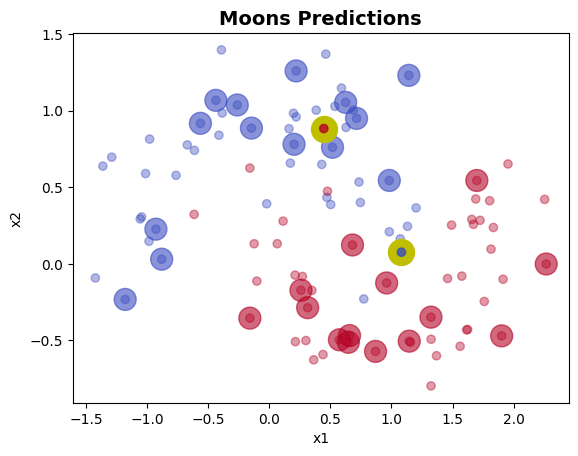

In [ ]:
cmap_data = plt.cm.coolwarm

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



### CASO: 10 year risk of coronary heart disease CHD
Aqui o objetivo da classificação é prever se o paciente tem 10 anos de risco de futura doença cardíaca coronariana (ACS). O conjunto de dados fornece informações de mais de 4.000 pacientes residentes da cidade de Framingham, Massachusettse com 15 atributos.

A variável objetivo é TenYearCHD, 10 year risk of coronary heart disease CHD (onde “1”, significa “Yes”, “0” significa “No”)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Preparação dos Dados
As variáveis preditoras são todas numéricas e não há, portanto, necessidade de transformação dos dados. Há, entretanto, valores ausentes que precisam ser tratados.

In [ ]:
df.isnull().sum() / len(df)

male               0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

O percentual é pequeno e assim vamos simplesmente excluir os dados ausentes.

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


Aplicando o Modelo Logístico
Aplicamos o modelo ajustando agora as entradas X e y para o modelo. O max_iter do regressor também foi ajustado para 10000 uma vez que o conjunto de dados agora é maior e um maior número de iterações será necessário para convergência dos parâmetros.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )

[0 0 1 0 0 0 0 0 0 0] ...
0.8518316019682887


Predição de Novos Casos
Se considerarmos 0.85 um bom resultado podemos então aplicar o modelo para novos casos. Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()
X_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,56.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,268.0,146.0,89.0,27.71,85.0,86.0
1,1,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,259.0,141.0,90.0,28.30,80.0,87.0


In [ ]:
clf.predict(X_new)

array([0, 0])

Surpreendentemente esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()
clf.predict(X_new)

array([0, 1])

# Knn Metricas

vai aprender aqui como funciona e como implementar um modelo de K-Vizinhos mais Próximos para Classificação, um novo modelo de classificação e poderemos comparar o seu resultado com os que obtivemos antes com o classificador logístico.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

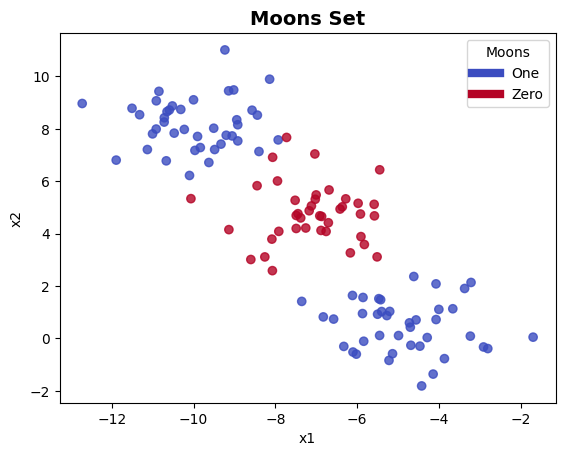

         x1        x2  y
0 -5.422578  1.477418  0
1 -5.270181  0.872708  0
2 -2.800484 -0.387307  0
3 -8.064956  6.915338  1
4 -6.111296  1.640534  0


In [ ]:
from sklearn.datasets import make_moons, make_blobs
cmap_data = plt.cm.coolwarm

X, y = make_blobs(n_samples=120, n_features=2, random_state=12)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
df.y = df.y.replace(1,2)
df.y = df.y.replace(0,1)
df.y = df.y.replace(2,0)

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [ ]:
df.y.value_counts()

0    80
1    40
Name: y, dtype: int64

## Aplicação do Classificador Logístico
Vamos agora aplicar o classificador Logístico que você já conhece empregando 0.3 dos dados para teste.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[1 0 0 0 0 0 0 0 0 0] ...
0.69


Você obtêm, então, um resultado com 69% de acuracidade, com 11 erros de classificação sobre o conjunto de teste. Nada mal, afinal são quase 70% de acerto! Você certamente apostaria em qualquer coisa com chance de 70%.

In [ ]:
sum(y_test != y_pred)

11

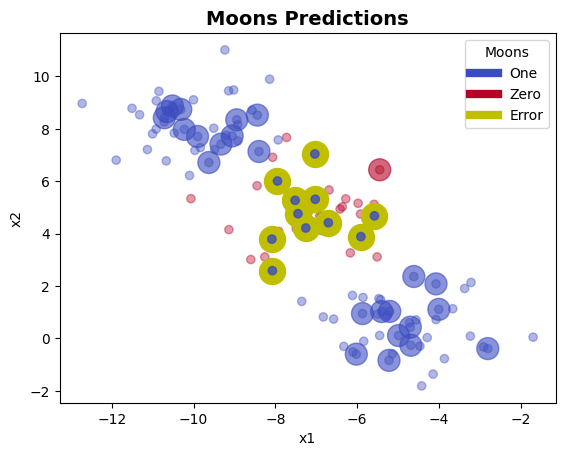

In [ ]:
cmap_data = plt.cm.coolwarm

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()

Esse resultado não parece muito bom, mas você já esperava por isso: a regressão logística não consegue separar perfeitamente classes que não sejam linearmente separáveis!

Mas valores muito altos de acuracidade não iriam permitir explorarmos melhor outras métricas que você verá a seguir.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[24  0]
 [11  1]]

Score de Acuracidade (1):

0.69

Score de Acuracidade (2):

0.69

Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36



![imagem](https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/matriz_de_confusao.png)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')

print('\t\t\t    y_pred \n')
print('\t\t\t 0 \t 1')
print('\t\t' + 29*'-')
print('\t\t  0  | \t ' + 'TP=' + str(cm[1,1]) + '\t' + 'FN=' + str(cm[1,0]) + '    |  ' + str(cm[1,0] + cm[1,1]))
print('      y_test  \t  1  | \t ' + 'FP=' + str(cm[0,1]) + '\t' + 'TN=' + str(cm[0,0]) + '    |  ' + str(cm[0,0] + cm[0,1]))

print('\t\t' + 29*'-')
print('\t\t     | \t ' + str(cm[0,1] + cm[1,1]) + '\t' + str(cm[0,0] + cm[1,0]) + '       |  ')


Matriz de Confusão:

			    y_pred 

			 0 	 1
		-----------------------------
		  0  | 	 TP=24	FN=0    |  24
      y_test  	  1  | 	 FP=11	TN=1    |  12
		-----------------------------
		     | 	 35	1       |  


Dessa matriz saem todos os valores e métricas úteis para a análise dos resultados. Particularmente, interessam os valores:

Verdadeiro positivo (TP), em que valor previsto corresponde ao valor real, isto é o valor real era positivo e o modelo previu um valor positivo

Verdadeiro negativo (TN), em que o valor real era negativo e o modelo previu um valor negativo também corretamente

Falso Positivo (FP), Ou Erro Tipo 1, em que o valor real era negativo, mas o modelo previu um valor positivo. É o caso em que o modelo é superestimado, gerando falsos alarmes.

Falso negativo (FN), Ou Erro tipo 2, em que o valor real era positivo, mas o modelo previu um valor negativo. É o caso em que o modelo é substimado, gerando perda de casos positivos.

Esses valores já permitem você identificar que nosso modelo não tem a mesma eficiência para as duas classes.

Nosso modelo é superestimado, ele prevê muito mais casos positivos do que na realidade acontecem. Ele previu com sucesso 100% dos casos positivo, isto é, não há nenhum falso negativo ou erro tipo 2. Entretanto, sendo superestimado, produz um grande número (a maior parte, ou 11 em cada 12 casos) falsos positivos, ou erro tipo 1.

Por exemplo, se 0 (positivo) representa pacientes com diagnóstico positivo para uma doença, nosso detecta corretamente 100% dos casos da doença, mas gera um número muito grande de falsos positivos e não serviria, portanto, para ser empregado em um exame (embora o erro tipo 2, não detectar os casos positivos fosse, no caso de doenças ainda mais grave). Desse modo, você pode concluir que nosso modelo, que não parecia tão ruim à primeira vista, é de fato um modelo que não pode ser empregado.

Dessas medidas  TP+FP+TN+FN  se derivam dezenas de métricas de eficiência dos modelos. Nos deteremos aqui apenas nas mais importantes e você pode consultar https://en.wikipedia.org/wiki/Confusion_matrix para muitas outras métricas.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

TP, FP, FN, TN = cm.T.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)


Matriz de Confusão:

[[24  0]
 [11  1]]

TP =  24 
FP =  11 
FN =  0 
TN =  1


In [ ]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
print(f'{Accuracy:.2f}')

0.69


In [ ]:
Recall = TP/(TP + FN)
print(f'{Recall:.2f}')

1.00


## Classification Report
Todos conceitos acima são importantes para entendermos as métricas, mas todas essas métricas são mais facilmente obtidas no classification_report.

In [ ]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36



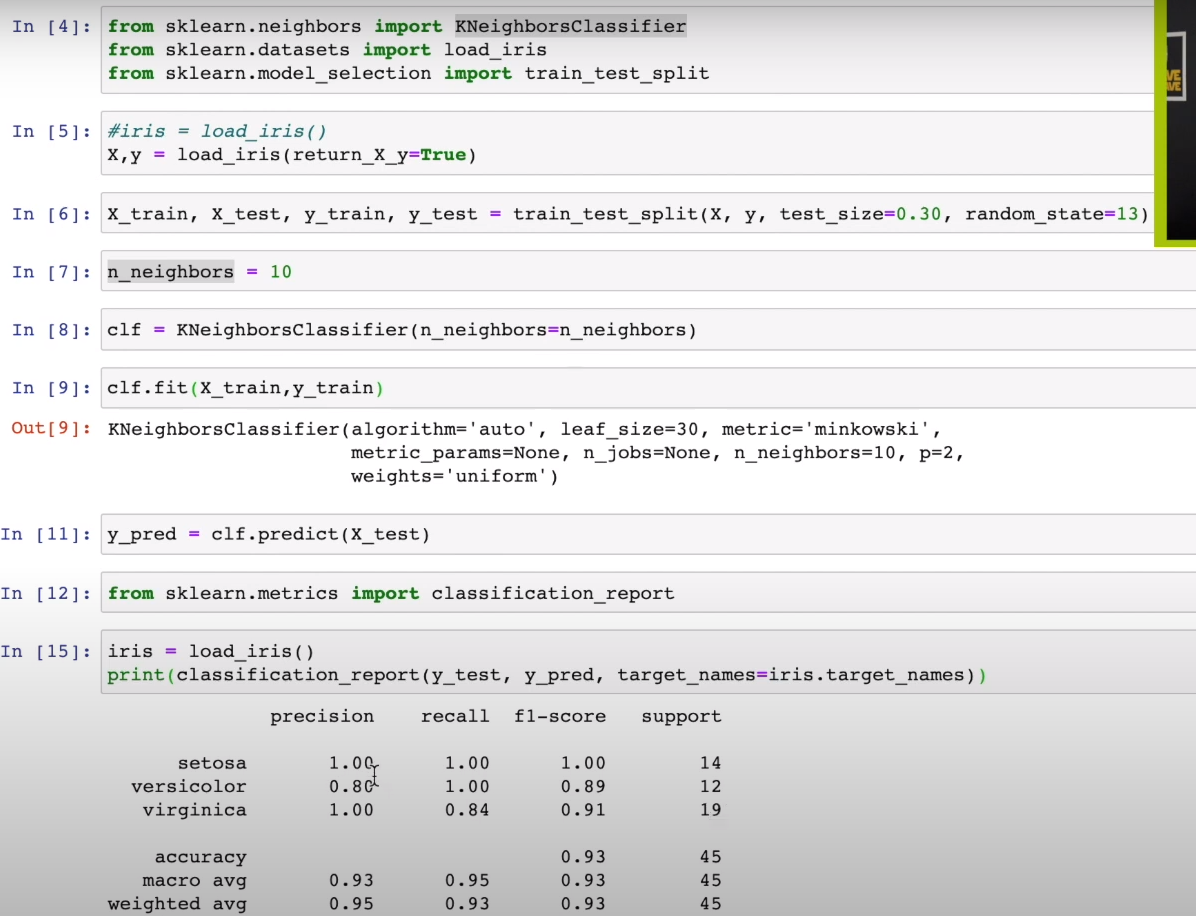

## CASO: 10 year risk of coronary heart disease CHD
Vamos revisitar o exemplo da aula anterior em que previmos um paciente com 10 anos de risco de futura doença cardíaca coronariana (ACS) e analisar melhor os resultados obtidos. Nossa variável objetivo aqui é TenYearCHD, 10 year risk of coronary heart disease CHD (onde “1”, significa “Yes”, “0” significa “No”)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Preparação dos Dados
Vamos, como antes, simplesmente excluir os dados ausentes.

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


### Aplicando o Modelo Logístico
Aplicamos o modelo ajustando agora as entradas X e y para o modelo. O max_iter do regressor também foi ajustado para 10000 uma vez que o conjunto de dados agora é maior e um maior número de iterações será necessário para convergência dos parâmetros.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 0 0] ...
0.85


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[919  12]
 [153  14]]

Score de Acuracidade (1):

0.85

Score de Acuracidade (2):

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       931
           1       0.54      0.08      0.15       167

    accuracy                           0.85      1098
   macro avg       0.70      0.54      0.53      1098
weighted avg       0.81      0.85      0.80      1098



### Análise
Como você pode ver, apesar da acuracidade de  0.85  do nosso modelo, ele acerta apenas pouco mais que uma moeda ( 0.5  é são as chances de cara ou coroa),  0.56 , dos casos positivos de doença. Além disso apenas 0.08 dos casos de doença foram identificados pelo modelo. Esses dois valores se refletem também baixo F1-score médio desse modelo. Este é, portanto, um péssimo modelo se o objetivo é identificar pacientes em risco!

## CASO: 10 year risk of coronary heart disease CHD
Vamos agora empregar os mesmos dados que empregamos antes com o classificador logístico e aplicar um modelo de K-Vizinhos Mais Próximos.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Preparação dos Dados
Vamos, como antes, simplesmente excluir os dados ausentes.

In [ ]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


Aplicando o Modelo Knn
Vamos agora aplicar um modelo Knn, k=3, e comparar os resultados com o classificador logístico.

Antes de prosseguir note a semelhança das implementações dos estimadores de classificação do scikit-learn. Eles seguem a mesma estrutura, e são semelhantes também ao estimadores de regressão embora lá não tenhamos empregado a separação de conjuntos de treinamento e teste que funcionam de modo diferente. Basicamente, além dos imports, apenas a definição do estimador precisa ser alterada.

Implementação do Modelo logístico

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

In [ ]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 0 0] ...
0.85


Implementação do Modelo Knn

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 0 0] ...
0.85


O esquema acima é bastante simples, mas ainda pode ser necessário incluir preparações dos dados para uso nos modelos. No caso, veja que concluímos que no caso do Knn é importante aplicarmos a normalização das variáveis preditoras X. Isso precisa, então, ser incluído no seu código (note, isso poderia ser omitido se você transformasse os dados originais para então atribuir à X).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df.drop(columns=['TenYearCHD'])
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 1 0] ...
0.82


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[865  66]
 [136  31]]

Score de Acuracidade (1):

0.82

Score de Acuracidade (2):

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       931
           1       0.32      0.19      0.23       167

    accuracy                           0.82      1098
   macro avg       0.59      0.56      0.57      1098
weighted avg       0.78      0.82      0.79      1098



Análise
Embora com uma acuracidade um pouco menor que a obtida no modelo logístico o modelo de K-Vizinhos, com k=3, apresenta um resultado mais balanceado entre as classes e poderíamos sugerir empregar este modelo como um modelo mais adequado.

Essa análise, entretanto, não é definitiva e estamos, por hora, apenas explorando como diferentes modelos podem levar a resultados diferentes e como compará-los. Nossa jornada para escolha de melhores modelos está apenas começando e isso está longe de ser uma tarefa simples.

Predição de Novos Casos
Se considerarmos 0.82 um bom resultado, esse é um bom modelo e podemos então aplicá-lo para novos casos do mesmo modo que fizemos antes com o classificador logístico (aula anterior). Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

Você deve notar agora que, como fizemos uma transformação dos dados das variáveis preditoras precisamos aplicar esta mesma transformação (a normalização!) nos valores dos novos casos. Como empregamos um estimador scaler, podemos empregar essa mesma transformação e você pode notar também que, se não tivéssemos empregado um estimador, não saberíamos como aplicar a mesma transformação! Essa a vantagem de empregarmos um estimador para isso!

In [ ]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()

X_new = scaler.transform(X_new)
X_new


array([[0.        , 0.63157895, 0.66666667, 1.        , 0.14285714,
        0.        , 0.        , 1.        , 0.        , 0.31827515,
        0.29550827, 0.43386243, 0.2949588 , 0.41414141, 0.1299435 ],
       [1.        , 0.63157895, 0.66666667, 1.        , 0.28571429,
        0.        , 0.        , 1.        , 0.        , 0.29979466,
        0.27186761, 0.44444444, 0.30925836, 0.36363636, 0.13276836]])

In [ ]:
clf.predict(X_new)

array([0, 0])